In [138]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta
import seaborn as sns
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
from random import randrange
import seaborn as sns
list_tables = sorted(os.listdir("Archivos Ecobici"))
from datetime import datetime,timedelta

In [2]:
list_tables

['2017-11.csv',
 '2017-12.csv',
 '2018-01.csv',
 '2018-02.csv',
 '2018-03.csv',
 '2018-04.csv',
 '2018-05.csv',
 '2018-06.csv',
 '2018-07.csv',
 '2018-08.csv',
 '2018-09.csv',
 '2018-10.csv',
 '2018-11.csv',
 '2018-12.csv',
 '2019-01.csv',
 '2019-02.csv',
 '2019-03.csv',
 '2019-04.csv',
 '2019-05.csv',
 '2019-06.csv',
 '2019-07.csv',
 '2019-08.csv',
 '2019-09.csv',
 '2019-10.csv']

In [3]:
df=pd.DataFrame()
for table_in_i in list_tables:
    aux = pd.read_csv(os.path.join('Archivos Ecobici',table_in_i))
    tiempo_inicio =  time.strftime("%H:%M:%S") 
 
    df = pd.concat([df, aux],axis = 0)
    tiempo_fin =  time.strftime("%H:%M:%S")
    print(table_in_i,'Tiempo inicio ->',tiempo_inicio,'Tiempo fin',tiempo_fin)

    #     df = pd.concat([df,pd.read_csv(os.path.join('Archivos Ecobici',table_in_i))],axis = 0)
df = df.drop(columns = 'Unnamed: 9')
print('dimension de la tabla',df.shape)
print('Columnas',df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2017-11.csv Tiempo inicio -> 07:30:02 Tiempo fin 07:30:02
2017-12.csv Tiempo inicio -> 07:30:03 Tiempo fin 07:30:03
2018-01.csv Tiempo inicio -> 07:30:05 Tiempo fin 07:30:05
2018-02.csv Tiempo inicio -> 07:30:06 Tiempo fin 07:30:08
2018-03.csv Tiempo inicio -> 07:30:09 Tiempo fin 07:30:10
2018-04.csv Tiempo inicio -> 07:30:11 Tiempo fin 07:30:13
2018-05.csv Tiempo inicio -> 07:30:14 Tiempo fin 07:30:15
2018-06.csv Tiempo inicio -> 07:30:16 Tiempo fin 07:30:18
2018-07.csv Tiempo inicio -> 07:30:19 Tiempo fin 07:30:21
2018-08.csv Tiempo inicio -> 07:30:25 Tiempo fin 07:30:28
2018-09.csv Tiempo inicio -> 07:30:29 Tiempo fin 07:30:33
2018-10.csv Tiempo inicio -> 07:30:34 Tiempo fin 07:30:37
2018-11.csv Tiempo inicio -> 07:30:41 Tiempo fin 07:30:44
2018-12.csv Tiempo inicio -> 07:30:45 Tiempo fin 07:30:49
2019-01.csv Tiempo inicio -> 07:30:50 Tiempo fin 07:30:54
2019-02.csv Tiempo inicio -> 07:30:57 Tiempo fin 07:31:01


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2019-03.csv Tiempo inicio -> 07:31:02 Tiempo fin 07:31:07
2019-04.csv Tiempo inicio -> 07:31:13 Tiempo fin 07:31:20
2019-05.csv Tiempo inicio -> 07:31:21 Tiempo fin 07:31:27
2019-06.csv Tiempo inicio -> 07:31:29 Tiempo fin 07:31:36
2019-07.csv Tiempo inicio -> 07:31:37 Tiempo fin 07:31:45
2019-08.csv Tiempo inicio -> 07:31:47 Tiempo fin 07:31:54
2019-09.csv Tiempo inicio -> 07:31:57 Tiempo fin 07:32:05
2019-10.csv Tiempo inicio -> 07:32:07 Tiempo fin 07:32:15
dimension de la tabla (17104573, 9)
Columnas Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion_Arribo', 'Fecha_Arribo',
       'Hora_Arribo'],
      dtype='object')


# Limpieza de las variables: Bici y Cicloestaciones

In [4]:
bicis_sucias = pd.DataFrame(df['Bici'].unique())
estacion_retiro = pd.DataFrame(df['Ciclo_Estacion_Retiro'].unique())
estacion_arribo = pd.DataFrame(df['Ciclo_Estacion_Arribo'].unique())

In [5]:
bicis_sucias.to_excel('bicis_sucias.xlsx')
estacion_retiro.to_excel('estacion_retiro.xlsx')
estacion_arribo.to_excel('estacion_arribo.xlsx')

In [6]:
ls_erase_bici = ['f2003','lab007','M000X','MXXXX','M00XX','M0XXX','f2002','1500C','C037',
            'C130','C222','C182','1340PRUEBA','f2009','lab003']
ls_erase_estacion = ['32:11.8']

In [7]:
bicis_sucias = df['Bici'].unique()
bicis_limpias_0= []
for bici_i in bicis_sucias:
    if bici_i not in ls_erase_bici:
        bicis_limpias_0.append(bici_i)

bicis_limpias = pd.DataFrame(bicis_limpias_0)
bicis_limpias.reset_index()
bicis_limpias.columns = ['Bici_aux']
bicis_limpias['Bici'] = bicis_limpias['Bici_aux'].astype(int)
bicis_limpias = bicis_limpias.drop(columns = ['Bici_aux'])

bicis_unicas  =  pd.DataFrame({'Bici':bicis_limpias['Bici'].unique()})
bicis_unicas['Bici'].astype(int)

bicis_old, columns = bicis_limpias.shape
bicis_limpias, columns = bicis_unicas.shape
print('Bicis limpias y repetidas ->',bicis_old,'Bicis Limpias y unicas',bicis_limpias)
print(bicis_unicas.dtypes)
bicis_unicas.head(5)

Bicis limpias y repetidas -> 16752 Bicis Limpias y unicas 8435
Bici    int32
dtype: object


,Bici
0,10225
1,8106
2,10899
3,9931
4,8934


In [8]:
# Aquì va la limpieza de las cicloestaciones

In [9]:
estacion_retiro_sucias = df['Ciclo_Estacion_Retiro'].unique()
estacion_retiro_limpias_0 = []
for estacion_i in estacion_retiro_sucias:
    if estacion_i not in ls_erase_estacion:
        estacion_retiro_limpias_0.append(estacion_i)
        
estacion_retiro_limpias = pd.DataFrame(estacion_retiro_limpias_0)
estacion_retiro_limpias.reset_index()
estacion_retiro_limpias.columns = ['Estacion_aux']
estacion_retiro_limpias['Ciclo_Estacion_Retiro'] = estacion_retiro_limpias['Estacion_aux'].astype(int)
estacion_retiro_limpias = estacion_retiro_limpias.drop(columns = ['Estacion_aux'])

estacion_retiro_unicas = pd.DataFrame({'Ciclo_Estacion_Retiro':estacion_retiro_limpias['Ciclo_Estacion_Retiro'].unique()})
estacion_retiro_unicas['Ciclo_Estacion_Retiro'].astype(int)

estaciones_old, columns = estacion_retiro_limpias.shape
estaciones_limpias, columns = estacion_retiro_unicas.shape
print('Estaciones limpias y repetidas ->',estaciones_old,'Estaciones Limpias y unicas',estaciones_limpias)
print(estacion_retiro_unicas.dtypes)
estacion_retiro_unicas.head(5)

Estaciones limpias y repetidas -> 485 Estaciones Limpias y unicas 485
Ciclo_Estacion_Retiro    int32
dtype: object


,Ciclo_Estacion_Retiro
0,169
1,359
2,84
3,137
4,134


In [10]:
estacion_Arribo_sucias = df['Ciclo_Estacion_Arribo'].unique()
estacion_Arribo_limpias_0 = []
for estacion_i in estacion_Arribo_sucias:
    if estacion_i not in ls_erase_estacion:
        estacion_Arribo_limpias_0.append(estacion_i)
        
estacion_Arribo_limpias = pd.DataFrame(estacion_Arribo_limpias_0)
estacion_Arribo_limpias.reset_index()
estacion_Arribo_limpias.columns = ['Estacion_aux']
estacion_Arribo_limpias['Ciclo_Estacion_Arribo'] = estacion_Arribo_limpias['Estacion_aux'].astype(int)
estacion_Arribo_limpias = estacion_Arribo_limpias.drop(columns = ['Estacion_aux'])

estacion_Arribo_unicas = pd.DataFrame({'Ciclo_Estacion_Arribo':estacion_Arribo_limpias['Ciclo_Estacion_Arribo'].unique()})
estacion_Arribo_unicas['Ciclo_Estacion_Arribo'].astype(int)

estaciones_old, columns = estacion_Arribo_limpias.shape
estaciones_limpias, columns = estacion_Arribo_unicas.shape
print('Estaciones limpias y repetidas ->',estaciones_old,'Estaciones Limpias y unicas',estaciones_limpias)
print(estacion_Arribo_unicas.dtypes)
estacion_Arribo_unicas.head(5)

Estaciones limpias y repetidas -> 964 Estaciones Limpias y unicas 485
Ciclo_Estacion_Arribo    int32
dtype: object


,Ciclo_Estacion_Arribo
0,447
1,338
2,150
3,182
4,116


In [11]:
df_aux_ret = estacion_retiro_unicas.reset_index()
df_aux_arri = estacion_Arribo_unicas.reset_index()
print('Columnas retiro',df_aux_ret.columns)
print('Columnas arribo',df_aux_arri.columns )

df_estaciones = df_aux_ret.merge(df_aux_arri , how='outer' ,left_on='Ciclo_Estacion_Retiro', right_on='Ciclo_Estacion_Arribo')
# df_estaciones.rename(columns={'index_x' : 'Conteo_Est_Retiro','index_y':'Conteo_Est_Arribo'}, inplace=True)
df_estaciones = df_estaciones.drop(columns = ['index_x','index_y'])
print(df_estaciones.shape)
df_estaciones.head(5)

Columnas retiro Index(['index', 'Ciclo_Estacion_Retiro'], dtype='object')
Columnas arribo Index(['index', 'Ciclo_Estacion_Arribo'], dtype='object')
(485, 2)


,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo
0,169,169
1,359,359
2,84,84
3,137,137
4,134,134


In [12]:
df_aux_r = estacion_retiro_unicas
df_aux_r = df_aux_r.rename(columns={'Ciclo_Estacion_Retiro' : 'Estacion'})

df_aux_a = estacion_Arribo_unicas
df_aux_a = df_aux_a.rename(columns={'Ciclo_Estacion_Arribo' : 'Estacion'})

Estaciones=pd.DataFrame()
Estaciones = pd.concat([Estaciones, df_aux_r],axis = 0)
Estaciones = pd.concat([Estaciones, df_aux_a],axis = 0)
Estaciones.sort_values(['Estacion'],ascending=True, inplace=True)

estaciones_unicas = pd.DataFrame({'Estaciones_unicas':Estaciones['Estacion'].unique()})
estaciones_unicas.sort_values(['Estaciones_unicas'],ascending=True,inplace=True)
estaciones_unicas.head(5)

,Estaciones_unicas
0,1
1,2
2,3
3,4
4,5


In [13]:
valida_estaciones_arri = estaciones_unicas.merge(estacion_Arribo_unicas,left_on = 'Estaciones_unicas', right_on = 'Ciclo_Estacion_Arribo')
estaciones_arribo, col = valida_estaciones_arri.shape

valida_estaciones_ret = estaciones_unicas.merge(estacion_retiro_unicas,left_on = 'Estaciones_unicas', right_on = 'Ciclo_Estacion_Retiro')
estaciones_retiro, col = valida_estaciones_ret.shape
print('Sin son 485 ambos, significa que tienen las mismas estaciones')
print('Estaciones arribo',estaciones_arribo,'Estaciones Retiro',estaciones_retiro)

Sin son 485 ambos, significa que tienen las mismas estaciones
Estaciones arribo 485 Estaciones Retiro 485


Entonces... Se puede tomar valores aleatorios de éstas 485 estaciones y ver si los cluster son los mismos en arribo y retiro o cuales son las diferencias

In [14]:
estaciones_unicas.head(10)

,Estaciones_unicas
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [15]:
def Proc_freq_sin_aumulados(data,var):
    
    tabla_aux = pd.DataFrame(data)
    
    table_freq = pd.value_counts(tabla_aux[var]).to_frame().reset_index()
    table_freq.columns = [var,'Frequency']

    table_porc = pd.value_counts(tabla_aux[var],normalize = True).to_frame().reset_index()
    table_porc.columns = [var,'aux']
    
    table_porc['Percent'] = table_porc['aux'] *100
    
    table_porc['Percent'].round(3) 
    table_porc = table_porc.drop(columns = 'aux')
    
    table_salida = pd.merge(table_freq, table_porc, on=var)
       
    return table_salida

### Ya tengo los valores unicos y limpios. Sigue limpiar la base y quedarme con estos valores. 

#### Limpieza Estación Arribo 

In [16]:
ls_erase_estacion = ['32:11.8']

df['Ciclo_Estacion_Arribo_aux'] = df.Ciclo_Estacion_Arribo.astype(str)
df['Flag_aux'] = df['Ciclo_Estacion_Arribo_aux'].str.contains(*ls_erase_estacion)

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,99.999994
1,True,1,0.000006


In [17]:
df = df[df['Flag_aux'] == False]

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,100.0


In [18]:
df['Ciclo_Estacion_Arribo'] = df['Ciclo_Estacion_Arribo'].astype(int)
df = df.drop(columns={'Ciclo_Estacion_Arribo_aux','Flag_aux'})

#### Limpieza Estación Retiro 

In [19]:
ls_erase_estacion = ['32:11.8']

df['Ciclo_Estacion_Retiro_aux'] = df.Ciclo_Estacion_Retiro.astype(str)
df['Flag_aux'] = df['Ciclo_Estacion_Retiro_aux'].str.contains(*ls_erase_estacion)

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,100.0


In [20]:
df = df[df['Flag_aux'] == False]

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,100.0


In [21]:
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].astype(int)
df = df.drop(columns={'Ciclo_Estacion_Retiro_aux','Flag_aux'})

#### Limpieza Bicis 

In [22]:
df['Bici_aux'] = df.Bici.astype(str)

print(df.dtypes)
df.head(5)

Genero_Usuario           object
Edad_Usuario              int64
Bici                     object
Ciclo_Estacion_Retiro     int32
Fecha_Retiro             object
Hora_Retiro              object
Ciclo_Estacion_Arribo     int32
Fecha_Arribo             object
Hora_Arribo              object
Bici_aux                 object
dtype: object


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Bici_aux
0,M,44,10225,169,01/11/2017,0:00:09,447,01/11/2017,0:11:47,10225
1,M,35,8106,359,01/11/2017,0:02:16,338,01/11/2017,0:05:54,8106
2,M,27,10899,84,01/11/2017,0:02:54,150,01/11/2017,0:06:30,10899
3,M,27,9931,137,01/11/2017,0:03:12,182,01/11/2017,0:19:02,9931
4,M,23,8934,134,01/11/2017,0:03:54,116,01/11/2017,0:10:24,8934


In [23]:
ls_erase_bici = ['f2003','lab007','M000X','MXXXX','M00XX','f2002','1500C',
                 'C037' ,'C130' ,'C222','1340PRUEBA','f2009','lab003','M0XXX','C182','f2003']
df['Filtro'] = 0

In [24]:
for ls_erase_bici_i in ls_erase_bici:
    ls_erase_bici_0 = [ls_erase_bici_i]
    Nom_var_aux = 'Aux_' + ls_erase_bici_i
    print('Para la syntaxis ->',ls_erase_bici_0,'Valor raro ->',ls_erase_bici_i,'Auxiliar en tabla',Nom_var_aux)
    
    df[Nom_var_aux] = df['Bici_aux'].str.contains(*ls_erase_bici_0).astype(int)
    df['Filtro'] = df['Filtro'] + df[Nom_var_aux]
    df = df.drop(columns={Nom_var_aux})
    
    Dist_Filtro =  Proc_freq_sin_aumulados(df,'Filtro')
    print(Dist_Filtro)

Para la syntaxis -> ['f2003'] Valor raro -> f2003 Auxiliar en tabla Aux_f2003
   Filtro  Frequency    Percent
0       0   17104553  99.999889
1       1         19   0.000111
Para la syntaxis -> ['lab007'] Valor raro -> lab007 Auxiliar en tabla Aux_lab007
   Filtro  Frequency    Percent
0       0   17104549  99.999866
1       1         23   0.000134
Para la syntaxis -> ['M000X'] Valor raro -> M000X Auxiliar en tabla Aux_M000X
   Filtro  Frequency   Percent
0       0   17104442  99.99924
1       1        130   0.00076
Para la syntaxis -> ['MXXXX'] Valor raro -> MXXXX Auxiliar en tabla Aux_MXXXX
   Filtro  Frequency    Percent
0       0   17104439  99.999222
1       1        133   0.000778
Para la syntaxis -> ['M00XX'] Valor raro -> M00XX Auxiliar en tabla Aux_M00XX
   Filtro  Frequency    Percent
0       0   17104437  99.999211
1       1        135   0.000789
Para la syntaxis -> ['f2002'] Valor raro -> f2002 Auxiliar en tabla Aux_f2002
   Filtro  Frequency    Percent
0       0   17104427

In [25]:
df.head(5)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Bici_aux,Filtro
0,M,44,10225,169,01/11/2017,0:00:09,447,01/11/2017,0:11:47,10225,0
1,M,35,8106,359,01/11/2017,0:02:16,338,01/11/2017,0:05:54,8106,0
2,M,27,10899,84,01/11/2017,0:02:54,150,01/11/2017,0:06:30,10899,0
3,M,27,9931,137,01/11/2017,0:03:12,182,01/11/2017,0:19:02,9931,0
4,M,23,8934,134,01/11/2017,0:03:54,116,01/11/2017,0:10:24,8934,0


In [26]:
df = df[df['Filtro'] == 0]
df['Bici'] = df['Bici'].astype(int)

In [27]:
df.shape

(17103664, 11)

In [28]:
df.dtypes

Genero_Usuario           object
Edad_Usuario              int64
Bici                      int32
Ciclo_Estacion_Retiro     int32
Fecha_Retiro             object
Hora_Retiro              object
Ciclo_Estacion_Arribo     int32
Fecha_Arribo             object
Hora_Arribo              object
Bici_aux                 object
Filtro                    int64
dtype: object

# Analisis Nivel Estación

In [29]:
ls_random = []
renglones_filt,col = estaciones_unicas.shape
for x  in range (renglones_filt):
    ls_random.append(random.randrange(0,10000)/10000)

estaciones_unicas['Random_Digit'] = ls_random
estaciones_unicas['Random_Digit'].describe(percentiles = [x/10 for x in range(10)]+[0.01, 0.05, 0.95, 0.99])

count    485.000000
mean       0.482016
std        0.285391
min        0.001400
0%         0.001400
1%         0.014740
5%         0.055900
10%        0.094460
20%        0.190020
30%        0.283500
40%        0.364900
50%        0.475100
60%        0.580740
70%        0.678940
80%        0.774000
90%        0.889820
95%        0.931480
99%        0.985408
max        0.998900
Name: Random_Digit, dtype: float64

In [30]:
estaciones_unicas.head(10)

,Estaciones_unicas,Random_Digit
0,1,0.5884
1,2,0.6590
2,3,0.4106
3,4,0.6872
4,5,0.3265
5,6,0.1773
6,7,0.4433
7,8,0.3507
8,9,0.6987
9,10,0.7506


In [31]:
tamanio_muestra = 10/100
# 10 %

In [32]:
muestra_0 = estaciones_unicas[(estaciones_unicas["Random_Digit"] <= tamanio_muestra)]
print(muestra_0.shape)
muestra_0

(51, 2)


,Estaciones_unicas,Random_Digit
16,17,0.0199
18,19,0.0743
24,25,0.0552
29,30,0.0191
44,45,0.0902
45,46,0.0925
47,48,0.0575
53,54,0.0017
55,56,0.0210
68,69,0.0443


In [33]:
muestra_0 = muestra_0.drop(columns = "Random_Digit").reset_index()
muestra_0 = muestra_0.drop(columns = "index")
renglones_muestra_0, col = muestra_0.shape
print('El numero de renglones y columnas es',renglones_muestra_0)
muestra_0

El numero de renglones y columnas es 51


,Estaciones_unicas
0,17
1,19
2,25
3,30
4,45
5,46
6,48
7,54
8,56
9,69


## Se le pega la colonia y la Alcadía a la muestra 

In [34]:
Estaciones_Informacion_Demografica = pd.read_excel('Estaciones_Informacion_Demografica_delegaciones.xlsx')
print(Proc_freq_sin_aumulados(Estaciones_Informacion_Demografica,'Alcaldia'))
estaciones , algo =Estaciones_Informacion_Demografica.shape 
print('Hay ',estaciones,' con información demografica')
Estaciones_Informacion_Demografica.head(5)

         Alcaldia  Frequency    Percent
0  Miguel Hidalgo        173  36.116910
1      Cuauhtémoc        167  34.864301
2   Benito Juarez        139  29.018789
Hay  479  con información demografica


,Cicloestacion,Colonia,Alcaldia
0,1,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc
1,2,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc
2,3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
3,4,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc
4,5,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc


In [35]:
muestra = pd.merge(muestra_0,Estaciones_Informacion_Demografica, how = 'inner',left_on='Estaciones_unicas', right_on='Cicloestacion')
muestra = muestra.drop(columns={'Cicloestacion'})
muestra

,Estaciones_unicas,Colonia,Alcaldia
0,17,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
1,19,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
2,25,Cuauhtémoc - Juárez,Cuauhtémoc
3,30,Cuauhtémoc - Juárez,Cuauhtémoc
4,45,Cuauhtémoc - Roma Norte,Cuauhtémoc
5,46,Cuauhtémoc - Roma Norte,Cuauhtémoc
6,48,Cuauhtémoc - Centro,Cuauhtémoc
7,54,Cuauhtémoc - Condesa,Cuauhtémoc
8,56,Cuauhtémoc - Roma Norte,Cuauhtémoc
9,69,Cuauhtémoc - Hipódromo,Cuauhtémoc


In [36]:
Estaciones_alcaldia =  Proc_freq_sin_aumulados(muestra,'Alcaldia')
Estaciones_alcaldia

,Alcaldia,Frequency,Percent
0,Miguel Hidalgo,20,40.816327
1,Cuauhtémoc,18,36.734694
2,Benito Juarez,11,22.448980


In [37]:
muestra_arribo = pd.merge(muestra, df , how='inner' ,left_on='Estaciones_unicas', right_on='Ciclo_Estacion_Arribo')
muestra_arribo = muestra_arribo.drop(columns={'Estaciones_unicas','Filtro'})
print(muestra_arribo.shape)

muestra_arribo.head(5)

(1950751, 12)


,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Bici_aux
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,01/11/2017,6:16:20,17,01/11/2017,6:28:54,7024
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,01/11/2017,6:44:52,17,01/11/2017,6:51:22,10135
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,01/11/2017,6:46:00,17,01/11/2017,6:52:59,9664
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,31,7279,254,01/11/2017,6:47:24,17,01/11/2017,6:55:36,7279
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,53,7627,256,01/11/2017,7:03:19,17,01/11/2017,7:15:29,7627


In [38]:
muestra_retiro = pd.merge(muestra, df , how='inner' ,left_on='Estaciones_unicas', right_on='Ciclo_Estacion_Retiro')
muestra_retiro = muestra_retiro.drop(columns={'Estaciones_unicas','Filtro'})
muestra_retiro.shape

(1832509, 12)

# Reglas de Negocio

##  Regla 1.
##  Los usuarios deben recojer y entregar la bici, generalmente, el mismo día

### Muestra Arribo 

In [39]:
muestra_arribo = muestra_arribo[muestra_arribo['Fecha_Arribo'] != '10']
muestra_arribo['Fecha_Arribo'] = pd.to_datetime(muestra_arribo['Fecha_Arribo'], format="%d/%m/%Y")

muestra_arribo['Fecha_Retiro'] = pd.to_datetime(muestra_arribo['Fecha_Retiro'], format="%d/%m/%Y")

muestra_arribo["dias_dif"] = muestra_arribo["Fecha_Retiro"] -muestra_arribo['Fecha_Arribo']
muestra_arribo["dias_dif"] = muestra_arribo[["dias_dif"]]/np.timedelta64(1,'D')

dias = Proc_freq_sin_aumulados(muestra_arribo,'dias_dif')
dias.sort_values(['Frequency'],ascending=True, inplace=True)
dias

,dias_dif,Frequency,Percent
6,-30.0,1,0.000051
7,-16.0,1,0.000051
8,-21.0,1,0.000051
9,-15.0,1,0.000051
10,-8.0,1,0.000051
11,-7.0,1,0.000051
12,-57.0,1,0.000051
5,-5.0,2,0.000103
4,-4.0,8,0.000410
3,-3.0,29,0.001487


Validado, más del 99% tienen como fecha de arribo y de entrega el mismo día. Me quedo con ésta población con dias_dif = 0.

In [40]:
abajo = 0
arriba = 0
variable_quitar = 'dias_dif'
renglones_ini, columns = muestra_arribo.shape
muestra_arribo = muestra_arribo[(abajo <= muestra_arribo[variable_quitar]) & (muestra_arribo[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_arribo.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 1950751 renglones y finalizamos con  1946782


### Muestra Retiro

In [41]:
muestra_retiro = muestra_retiro[muestra_retiro['Fecha_Arribo'] != '10']
muestra_retiro['Fecha_Arribo'] = pd.to_datetime(muestra_retiro['Fecha_Arribo'], format="%d/%m/%Y")

muestra_retiro['Fecha_Retiro'] = pd.to_datetime(muestra_retiro['Fecha_Retiro'], format="%d/%m/%Y")

muestra_retiro["dias_dif"] = muestra_retiro["Fecha_Retiro"] -muestra_retiro['Fecha_Arribo']
muestra_retiro["dias_dif"] = muestra_retiro[["dias_dif"]]/np.timedelta64(1,'D')

dias = Proc_freq_sin_aumulados(muestra_retiro,'dias_dif')
dias.sort_values(['Frequency'],ascending=True, inplace=True)
dias

,dias_dif,Frequency,Percent
12,-636.0,1,0.000055
23,-17.0,1,0.000055
22,-248.0,1,0.000055
21,-244.0,1,0.000055
20,-13.0,1,0.000055
19,-10.0,1,0.000055
18,-137.0,1,0.000055
17,-434.0,1,0.000055
16,-53.0,1,0.000055
15,-51.0,1,0.000055


Validado, más del 99% tienen como fecha de arribo y de entrega el mismo día. Me quedo con ésta población con dias_dif = 0.

In [42]:
abajo = 0
arriba = 0
variable_quitar = 'dias_dif'
renglones_ini, columns = muestra_retiro.shape
muestra_retiro = muestra_retiro[(abajo <= muestra_retiro[variable_quitar]) & (muestra_retiro[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_retiro.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 1832509 renglones y finalizamos con  1828131


# Regla 2.

## Se pueden utilizar hasta 45 minutos por viaje 

### Muestra Arribo 

In [43]:
muestra_arribo = muestra_arribo[muestra_arribo['Hora_Retiro'] != '18::']
muestra_arribo['Hora_Retiro'] = muestra_arribo['Hora_Retiro'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_arribo['hr_ret'] = muestra_arribo["Hora_Retiro"].dt.hour
muestra_arribo['Min_ret'] = muestra_arribo["Hora_Retiro"].dt.minute

muestra_arribo.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
muestra_arribo['Hora_Entrega'] = muestra_arribo['Hora_Entrega'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_arribo['Hr_entrega'] = muestra_arribo["Hora_Entrega"].dt.hour
muestra_arribo['Min_entrega'] = muestra_arribo["Hora_Entrega"].dt.minute

muestra_arribo["Minutos_de_uso"] = (muestra_arribo['Hr_entrega']  - muestra_arribo['hr_ret']) * 60    +  (muestra_arribo['Min_entrega'] - muestra_arribo['Min_ret'])

minutos_uso = Proc_freq_sin_aumulados(muestra_arribo,'Minutos_de_uso')
minutos_uso.sort_values(['Minutos_de_uso'],ascending=False, inplace=True)
minutos_uso

,Minutos_de_uso,Frequency,Percent
617,1364,1,0.000051
679,1015,1,0.000051
618,954,1,0.000051
562,943,1,0.000051
561,930,1,0.000051
...,...,...,...
5,4,103992,5.341738
11,3,69746,3.582630
23,2,24781,1.272921
43,1,2661,0.136687


In [44]:
def Normaliza_min_uso(data):
    if data['Minutos_de_uso'] < 0:
        val = -1
    elif data['Minutos_de_uso'] <= 5:
        val = 5
    elif data['Minutos_de_uso'] <= 10:
        val = 10
    elif data['Minutos_de_uso'] <= 15:
        val = 15
    elif data['Minutos_de_uso'] <= 20:
        val = 20
    elif data['Minutos_de_uso'] <= 25:
        val = 25
    elif data['Minutos_de_uso'] <= 30:
        val = 30
    elif data['Minutos_de_uso'] <= 45:
        val = 45
    elif data['Minutos_de_uso'] <= 90:
        val = 90
    elif data['Minutos_de_uso'] < 136:
        val = 135
    else:
        val = 136
    return val

In [45]:
muestra_arribo['Normaliza_Uso'] = muestra_arribo.apply(Normaliza_min_uso, axis=1)
minutos_uso_ = Proc_freq_sin_aumulados(muestra_arribo,'Normaliza_Uso')
minutos_uso_.sort_values(['Normaliza_Uso'],ascending=True, inplace=True)
minutos_uso_

,Normaliza_Uso,Frequency,Percent
2,5,322985,16.590712
0,10,582198,29.905660
1,15,396585,20.371310
3,20,246576,12.665825
4,25,156124,8.019593
6,30,103209,5.301518
5,45,115188,5.916841
7,90,18945,0.973144
9,135,2027,0.104121
8,136,2945,0.151275


In [46]:
tamanio, dimension =   muestra_arribo.shape
abajo = 5
arriba = 45
acumulado_uso = minutos_uso_[(abajo <= minutos_uso_['Normaliza_Uso']) & (minutos_uso_['Normaliza_Uso']<= arriba)]
print(sum(acumulado_uso['Percent']),'% corresponde a ',sum(acumulado_uso['Frequency']),'registros . Tamaño original',tamanio)
acumulado_uso

98.77145977310248 % corresponde a  1922865 registros . Tamaño original 1946782


,Normaliza_Uso,Frequency,Percent
2,5,322985,16.590712
0,10,582198,29.905660
1,15,396585,20.371310
3,20,246576,12.665825
4,25,156124,8.019593
6,30,103209,5.301518
5,45,115188,5.916841


Más del 98% de la población cumple con la regla de hasta 45 minutos de uso. Me quedo con ésta población.

In [47]:
abajo = 5
arriba = 45
variable_quitar = 'Normaliza_Uso'
renglones_ini, columns = muestra_arribo.shape
muestra_arribo = muestra_arribo[(abajo <= muestra_arribo[variable_quitar]) & (muestra_arribo[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_arribo.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 1946782 renglones y finalizamos con  1922865


In [48]:
muestra_arribo.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,hr_ret,Min_ret,Hr_entrega,Min_entrega,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,1900-01-01 06:16:20,17,2017-11-01,1900-01-01 06:28:54,7024,0.0,6,16,6,28,12,15
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,1900-01-01 06:44:52,17,2017-11-01,1900-01-01 06:51:22,10135,0.0,6,44,6,51,7,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,1900-01-01 06:46:00,17,2017-11-01,1900-01-01 06:52:59,9664,0.0,6,46,6,52,6,10
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,31,7279,254,2017-11-01,1900-01-01 06:47:24,17,2017-11-01,1900-01-01 06:55:36,7279,0.0,6,47,6,55,8,10
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,53,7627,256,2017-11-01,1900-01-01 07:03:19,17,2017-11-01,1900-01-01 07:15:29,7627,0.0,7,3,7,15,12,15


In [49]:
lst_erase = ['hr_ret','Min_ret','Hr_entrega','Min_entrega']
muestra_arribo = muestra_arribo.drop(columns = lst_erase)

In [50]:
muestra_arribo.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,1900-01-01 06:16:20,17,2017-11-01,1900-01-01 06:28:54,7024,0.0,12,15
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,1900-01-01 06:44:52,17,2017-11-01,1900-01-01 06:51:22,10135,0.0,7,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,1900-01-01 06:46:00,17,2017-11-01,1900-01-01 06:52:59,9664,0.0,6,10
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,31,7279,254,2017-11-01,1900-01-01 06:47:24,17,2017-11-01,1900-01-01 06:55:36,7279,0.0,8,10
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,53,7627,256,2017-11-01,1900-01-01 07:03:19,17,2017-11-01,1900-01-01 07:15:29,7627,0.0,12,15


### Muestra Retiro 

In [51]:
muestra_retiro = muestra_retiro[muestra_retiro['Hora_Retiro'] != '18::']
muestra_retiro['Hora_Retiro'] = muestra_retiro['Hora_Retiro'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_retiro['hr_ret'] = muestra_retiro["Hora_Retiro"].dt.hour
muestra_retiro['Min_ret'] = muestra_retiro["Hora_Retiro"].dt.minute

muestra_retiro.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
muestra_retiro['Hora_Entrega'] = muestra_retiro['Hora_Entrega'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_retiro['Hr_entrega'] = muestra_retiro["Hora_Entrega"].dt.hour
muestra_retiro['Min_entrega'] = muestra_retiro["Hora_Entrega"].dt.minute

muestra_retiro["Minutos_de_uso"] = (muestra_retiro['Hr_entrega']  - muestra_retiro['hr_ret']) * 60    +  (muestra_retiro['Min_entrega'] - muestra_retiro['Min_ret'])

minutos_uso = Proc_freq_sin_aumulados(muestra_retiro,'Minutos_de_uso')
minutos_uso.sort_values(['Minutos_de_uso'],ascending=False, inplace=True)
minutos_uso

,Minutos_de_uso,Frequency,Percent
572,1026,1,0.000055
684,999,1,0.000055
577,961,1,0.000055
574,956,1,0.000055
573,929,1,0.000055
...,...,...,...
10,3,67315,3.682176
22,2,24112,1.318943
43,1,2719,0.148731
48,0,1308,0.071548


In [52]:
muestra_retiro['Normaliza_Uso'] = muestra_retiro.apply(Normaliza_min_uso, axis=1)
minutos_uso_ = Proc_freq_sin_aumulados(muestra_retiro,'Normaliza_Uso')
minutos_uso_.sort_values(['Normaliza_Uso'],ascending=True, inplace=True)
minutos_uso_

,Normaliza_Uso,Frequency,Percent
10,-1,1,0.000055
2,5,309862,16.949661
0,10,568214,31.081689
1,15,368264,20.144289
3,20,219484,12.005923
4,25,139420,7.626368
6,30,92874,5.080271
5,45,105866,5.790942
7,90,19197,1.050089
9,135,2004,0.109620


In [53]:
tamanio, dimension =   muestra_retiro.shape
abajo = 5
arriba = 45
acumulado_uso = minutos_uso_[(abajo <= minutos_uso_['Normaliza_Uso']) & (minutos_uso_['Normaliza_Uso']<= arriba)]
print(sum(acumulado_uso['Percent']),'% corresponde a ',sum(acumulado_uso['Frequency']),'registros . Tamaño original',tamanio)
acumulado_uso

98.67914279665955 % corresponde a  1803984 registros . Tamaño original 1828131


,Normaliza_Uso,Frequency,Percent
2,5,309862,16.949661
0,10,568214,31.081689
1,15,368264,20.144289
3,20,219484,12.005923
4,25,139420,7.626368
6,30,92874,5.080271
5,45,105866,5.790942


Más del 98% de la población cumple con la regla de hasta 45 minutos de uso. Me quedo con ésta población.

In [54]:
abajo = 5
arriba = 45
variable_quitar = 'Normaliza_Uso'
renglones_ini, columns = muestra_retiro.shape
muestra_retiro = muestra_retiro[(abajo <= muestra_retiro[variable_quitar]) & (muestra_retiro[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_retiro.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 1828131 renglones y finalizamos con  1803984


In [55]:
muestra_retiro.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,hr_ret,Min_ret,Hr_entrega,Min_entrega,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,26,7592,17,2017-11-01,1900-01-01 00:11:37,252,2017-11-01,1900-01-01 00:19:29,7592,0.0,0,11,0,19,8,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,29,10440,17,2017-11-01,1900-01-01 07:23:00,14,2017-11-01,1900-01-01 07:27:56,10440,0.0,7,23,7,27,4,5
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,25,8695,17,2017-11-01,1900-01-01 07:31:07,27,2017-11-01,1900-01-01 07:34:35,8695,0.0,7,31,7,34,3,5
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,29,3049,17,2017-11-01,1900-01-01 07:38:00,261,2017-11-01,1900-01-01 07:42:19,3049,0.0,7,38,7,42,4,5
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,28,10596,17,2017-11-01,1900-01-01 07:38:47,209,2017-11-01,1900-01-01 08:00:46,10596,0.0,7,38,8,0,22,25


In [56]:
muestra_retiro = muestra_retiro.drop(columns = lst_erase)

In [57]:
muestra_retiro.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,26,7592,17,2017-11-01,1900-01-01 00:11:37,252,2017-11-01,1900-01-01 00:19:29,7592,0.0,8,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,29,10440,17,2017-11-01,1900-01-01 07:23:00,14,2017-11-01,1900-01-01 07:27:56,10440,0.0,4,5
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,25,8695,17,2017-11-01,1900-01-01 07:31:07,27,2017-11-01,1900-01-01 07:34:35,8695,0.0,3,5
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,29,3049,17,2017-11-01,1900-01-01 07:38:00,261,2017-11-01,1900-01-01 07:42:19,3049,0.0,4,5
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,28,10596,17,2017-11-01,1900-01-01 07:38:47,209,2017-11-01,1900-01-01 08:00:46,10596,0.0,22,25


## Regla 3.
## Validación que la variable genero sea binaria 

### Muestra Arribo 

In [58]:
genero = Proc_freq_sin_aumulados(muestra_arribo,'Genero_Usuario')
genero.sort_values(['Genero_Usuario'],ascending=True, inplace=True)
genero

,Genero_Usuario,Frequency,Percent
1,F,470341,24.460428
0,M,1452524,75.539572


No hay filtros por la variable de genero

### Muestra Retiro 

In [59]:
genero = Proc_freq_sin_aumulados(muestra_retiro,'Genero_Usuario')
genero.sort_values(['Genero_Usuario'],ascending=True, inplace=True)
genero

,Genero_Usuario,Frequency,Percent
1,F,439665,24.37189
0,M,1364319,75.62811


No hay filtros por la variable de genero

## Regla 4.
## La edad de los usuarios debe oscilar entre los 16 y 64 años 

### Muestra Arribo 

In [60]:
print(muestra_arribo.dtypes)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int64
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro              datetime64[ns]
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega             datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [61]:
muestra_arribo['Edad_Usuario'] = muestra_arribo['Edad_Usuario'].astype(int)

In [62]:
print(muestra_arribo.dtypes)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro              datetime64[ns]
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega             datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [63]:
def valida_edad_usuarios(data):
    if  16 <= data['Edad_Usuario'] & data['Edad_Usuario'] <= 64:
        val = 1
    else:
        val = 0
    return val

In [64]:
muestra_arribo['Flag_Edad']= muestra_arribo.apply(valida_edad_usuarios, axis=1)
Flag_Edad = Proc_freq_sin_aumulados(muestra_arribo,'Flag_Edad')
Flag_Edad.sort_values(['Flag_Edad'],ascending=True, inplace=True)
Flag_Edad

,Flag_Edad,Frequency,Percent
1,0,20584,1.070486
0,1,1902281,98.929514


Más del 98% está en la edad indicada por el negocio. Me quedo con ésta población.

In [65]:
abajo = 16
arriba = 64
variable_quitar = 'Edad_Usuario'
renglones_ini, columns = muestra_arribo.shape
muestra_arribo = muestra_arribo[(abajo <= muestra_arribo[variable_quitar]) & (muestra_arribo[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_arribo.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 1922865 renglones y finalizamos con  1902281


In [66]:
lst_erase = ['Flag_Edad']
muestra_arribo = muestra_arribo.drop(columns = lst_erase)

### Muestra Retiro 

In [67]:
print(muestra_retiro.dtypes)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int64
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro              datetime64[ns]
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega             datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [68]:
muestra_retiro['Edad_Usuario'] = muestra_retiro['Edad_Usuario'].astype(int)

In [69]:
print(muestra_retiro.dtypes)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro              datetime64[ns]
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega             datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [70]:
muestra_retiro['Flag_Edad']= muestra_retiro.apply(valida_edad_usuarios, axis=1)
Flag_Edad = Proc_freq_sin_aumulados(muestra_retiro,'Flag_Edad')
Flag_Edad.sort_values(['Flag_Edad'],ascending=True, inplace=True)
Flag_Edad

,Flag_Edad,Frequency,Percent
1,0,19912,1.103779
0,1,1784072,98.896221


Más del 98% está en la edad indicada por el negocio. Me quedo con ésta población.

In [71]:
abajo = 16
arriba = 64
variable_quitar = 'Edad_Usuario'
renglones_ini, columns = muestra_retiro.shape
muestra_retiro = muestra_retiro[(abajo <= muestra_retiro[variable_quitar]) & (muestra_retiro[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_retiro.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 1803984 renglones y finalizamos con  1784072


In [72]:
muestra_retiro = muestra_retiro.drop(columns = lst_erase)

## Terminan reglas de negocio 

.

## Había casos raros de bicis, hay que aseguarse que no estén en las muestras 
### (Aunque ya se habían quitado)

In [73]:
ls_casos_raros_bici = ['f2003','lab007','M000X','MXXXX','M00XX','M0XXX','f2002','1500C','C037',
            'C130','C222','C182','1340PRUEBA','f2009','lab003']

In [74]:
# Bicis limpias y únicas
print(bicis_unicas.shape)
bicis_unicas['Limpia'] = 1
sorted(bicis_unicas['Bici'])
print(bicis_unicas.dtypes)
bicis_unicas.head(5)

(8435, 1)
Bici      int32
Limpia    int64
dtype: object


,Bici,Limpia
0,10225,1
1,8106,1
2,10899,1
3,9931,1
4,8934,1


### Muestra Arribo  

In [75]:
muestra_arribo.head(3)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,1900-01-01 06:16:20,17,2017-11-01,1900-01-01 06:28:54,7024,0.0,12,15
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,1900-01-01 06:44:52,17,2017-11-01,1900-01-01 06:51:22,10135,0.0,7,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,1900-01-01 06:46:00,17,2017-11-01,1900-01-01 06:52:59,9664,0.0,6,10


In [76]:
muestra_arribo['Bici_aux'] = str(muestra_arribo['Bici'])

In [77]:
print(muestra_arribo.dtypes)
muestra_arribo.head(3)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro              datetime64[ns]
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega             datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,1900-01-01 06:16:20,17,2017-11-01,1900-01-01 06:28:54,0 7024\n1 10135\n2 ...,0.0,12,15
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,1900-01-01 06:44:52,17,2017-11-01,1900-01-01 06:51:22,0 7024\n1 10135\n2 ...,0.0,7,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,1900-01-01 06:46:00,17,2017-11-01,1900-01-01 06:52:59,0 7024\n1 10135\n2 ...,0.0,6,10


In [78]:
registros_ori, columns = muestra_arribo.shape
muestra_arribo_lista = muestra_arribo.merge(bicis_unicas, how='left',on='Bici')
registros_limpios, columns = muestra_arribo_lista.shape
basura = registros_ori - registros_limpios

print('Teníamos ',registros_ori,'registros','y nos quedamos con ',registros_limpios)
print('Nos quedamos con el ',(registros_limpios /registros_ori)*100,'% de la muestra')

Teníamos  1902281 registros y nos quedamos con  1902281
Nos quedamos con el  100.0 % de la muestra


In [79]:
muestra_arribo_lista.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso,Limpia
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,1900-01-01 06:16:20,17,2017-11-01,1900-01-01 06:28:54,0 7024\n1 10135\n2 ...,0.0,12,15,1
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,1900-01-01 06:44:52,17,2017-11-01,1900-01-01 06:51:22,0 7024\n1 10135\n2 ...,0.0,7,10,1
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,1900-01-01 06:46:00,17,2017-11-01,1900-01-01 06:52:59,0 7024\n1 10135\n2 ...,0.0,6,10,1
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,31,7279,254,2017-11-01,1900-01-01 06:47:24,17,2017-11-01,1900-01-01 06:55:36,0 7024\n1 10135\n2 ...,0.0,8,10,1
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,53,7627,256,2017-11-01,1900-01-01 07:03:19,17,2017-11-01,1900-01-01 07:15:29,0 7024\n1 10135\n2 ...,0.0,12,15,1


### Muestra Retiro  

In [80]:
muestra_retiro.head(3)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,26,7592,17,2017-11-01,1900-01-01 00:11:37,252,2017-11-01,1900-01-01 00:19:29,7592,0.0,8,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,29,10440,17,2017-11-01,1900-01-01 07:23:00,14,2017-11-01,1900-01-01 07:27:56,10440,0.0,4,5
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,25,8695,17,2017-11-01,1900-01-01 07:31:07,27,2017-11-01,1900-01-01 07:34:35,8695,0.0,3,5


In [81]:
registros_ori, columns = muestra_retiro.shape
muestra_retiro_lista = muestra_retiro.merge(bicis_unicas, how='inner',on='Bici')
registros_limpios, columns = muestra_retiro_lista.shape
basura = registros_ori - registros_limpios

print('Teníamos ',registros_ori,'registros','y nos quedamos con ',registros_limpios)
print('Nos quedamos con el ',(registros_limpios /registros_ori)*100,'% de la muestra')

Teníamos  1784072 registros y nos quedamos con  1784072
Nos quedamos con el  100.0 % de la muestra


.

### Ya están limpias las bases. Las reglas de negocio fueron validadas y aplicadas. Se puede empezar a jugar con las variables para las muestras de estaciones de arribo y de retiro

.

# Liberación de Memoria

In [82]:
df=pd.DataFrame()

# Creación de variables

In [83]:
def Dias_Espaniol(data):
    if data[var] == 0:
        val = 'Lunes'
    elif data[var] == 1:
        val = 'Martes'
    elif data[var] == 2:
        val = 'Miercoles'
    elif data[var] == 3:
        val = 'Jueves'
    elif data[var] == 4:
        val = 'Viernes'
    elif data[var] == 5:
        val = 'Sabado'
    elif data[var] == 6:
        val = 'Domingo'
    return val

### Muestra de Arribo

In [84]:
df_clean_A = muestra_arribo
df_clean_A = df_clean_A.drop(columns={'dias_dif','Bici_aux'})
df_clean_A['Genero_Usuario'] =df_clean_A['Genero_Usuario'].astype(str)

df_clean_A["Anio"] = df_clean_A["Fecha_Arribo"].dt.strftime("%Y")
df_clean_A["Mes"] = df_clean_A["Fecha_Arribo"].dt.strftime("%m")
df_clean_A["Num_day_sem"] = df_clean_A["Fecha_Retiro"].dt.weekday

df_clean_A["Hora_Retiro"] = df_clean_A["Hora_Retiro"].dt.strftime("%H")
df_clean_A.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
df_clean_A["Hora_Entrega"] = df_clean_A["Hora_Entrega"].dt.strftime("%H")

var = 'Num_day_sem'
df_clean_A['Dia_Sem']= df_clean_A.apply(Dias_Espaniol, axis=1)

df_clean_A['Anio'] = df_clean_A.Anio.astype(int) 
df_clean_A['Mes'] = df_clean_A.Mes.astype(int) 
df_clean_A['Cosecha'] = (df_clean_A['Anio'] * 100 ) + df_clean_A['Mes']


print(df_clean_A.dtypes)
df_clean_A.head(5)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro                      object
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega                     object
Minutos_de_uso                    int64
Normaliza_Uso                     int64
Anio                              int32
Mes                               int32
Num_day_sem                       int64
Dia_Sem                          object
Cosecha                           int32
dtype: object


,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,06,17,2017-11-01,06,12,15,2017,11,2,Miercoles,201711
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,06,17,2017-11-01,06,7,10,2017,11,2,Miercoles,201711
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,06,17,2017-11-01,06,6,10,2017,11,2,Miercoles,201711
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,31,7279,254,2017-11-01,06,17,2017-11-01,06,8,10,2017,11,2,Miercoles,201711
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,53,7627,256,2017-11-01,07,17,2017-11-01,07,12,15,2017,11,2,Miercoles,201711


In [85]:
# Hacerlo por trimestres
# Enero - Marzo
# Abril - Junio
# Julio - Septiembre
# Octubre - Diciembre
def Asignacion_Trimestres(data):
    var = 'Mes'
    if 1 <= data[var] & data[var] <= 3:
        val = (data['Anio'] * 100 ) + 1
    elif 4 <= data[var] & data[var] <= 6:
        val = (data['Anio'] * 100 ) + 2
    elif 7 <= data[var] & data[var] <= 9:
        val = (data['Anio'] * 100 ) + 3
    elif 10 <= data[var] & data[var] <= 12:
        val = (data['Anio'] * 100 ) + 4
    return val

In [86]:
df_clean_A['Trimestre'] = df_clean_A.apply(Asignacion_Trimestres, axis=1) 
df_clean_A.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha,Trimestre
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,62,7024,271,2017-11-01,06,17,2017-11-01,06,12,15,2017,11,2,Miercoles,201711,201704
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,34,10135,111,2017-11-01,06,17,2017-11-01,06,7,10,2017,11,2,Miercoles,201711,201704
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,49,9664,86,2017-11-01,06,17,2017-11-01,06,6,10,2017,11,2,Miercoles,201711,201704
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,31,7279,254,2017-11-01,06,17,2017-11-01,06,8,10,2017,11,2,Miercoles,201711,201704
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,53,7627,256,2017-11-01,07,17,2017-11-01,07,12,15,2017,11,2,Miercoles,201711,201704


In [87]:
temporalidad = 'Trimestre'
list_vintage_A = df_clean_A[temporalidad].unique()
list_vintage_A

array([201704, 201801, 201802, 201803, 201804, 201901, 201902, 201903,
       201904], dtype=int64)

In [88]:
df_modelar_A  = muestra
df_modelar_A = df_modelar_A.rename(columns={'Estaciones_unicas' : 'Ciclo_Estacion_Arribo'})

llave = 'Ciclo_Estacion_Arribo'

for vintage_i in list_vintage_A:
    df_i = df_clean_A[(vintage_i == df_clean_A[temporalidad])]
    renglones, columnas = df_i.shape
#     print('Vintage = ',vintage_i,'con', renglones)

#  Arribo es entregar la bici, es decir, a donde llegó

# Tiempo en llegar a esa estacion ...1
    Nom_var_minutos_mensuales = 'Minutos_Mensuales_' + f'{vintage_i}'
    Minutos_Mensuales_Estacion = df_i.groupby([llave])['Minutos_de_uso'].sum().reset_index()
    Minutos_Mensuales_Estacion.rename(columns={'Minutos_de_uso' :Nom_var_minutos_mensuales},inplace = True)
    
# Veces que se llegó a esa estacion (Frecuencia de uso) ...2
    Nom_var_dec = 'Freq_' + f'{vintage_i}'
    Frecuencia_de_uso = df_i.groupby([llave]).size().reset_index(name=Nom_var_dec)
    
# Tiempo promedio en llegar a esa estación = (1/2)
    Nom_var_prom = 'Minutos_prom_viaje_' + f'{vintage_i}'
    time_avg_arrib = pd.merge(Frecuencia_de_uso,Minutos_Mensuales_Estacion,on = llave,how = 'left')
    time_avg_arrib[Nom_var_prom] = time_avg_arrib[Nom_var_minutos_mensuales] / time_avg_arrib[Nom_var_dec]
    time_avg_arrib = time_avg_arrib.drop(columns={Nom_var_minutos_mensuales,Nom_var_dec})

# Maximo y minimos de uso

    
    df_modelar_A = pd.merge(df_modelar_A,time_avg_arrib,on = llave,how = 'left')
    df_modelar_A = df_modelar_A.fillna(0)


df_modelar_A

,Ciclo_Estacion_Arribo,Colonia,Alcaldia,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,17,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12.184331,12.325239,12.001282,11.878873,12.204839,12.256528,11.821752,12.078423,0.000000
1,19,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,11.980808,12.390547,11.842210,11.702661,11.855653,11.931729,11.502869,11.431435,11.366537
2,25,Cuauhtémoc - Juárez,Cuauhtémoc,14.155744,14.071050,13.841766,13.606285,13.978568,14.070899,13.742302,13.377247,13.632897
3,30,Cuauhtémoc - Juárez,Cuauhtémoc,0.000000,0.000000,0.000000,14.065508,13.833061,14.010419,13.074323,14.088843,14.027749
4,45,Cuauhtémoc - Roma Norte,Cuauhtémoc,10.268319,10.603354,10.899738,11.224308,11.277172,11.129498,10.922376,11.259314,11.572281
5,46,Cuauhtémoc - Roma Norte,Cuauhtémoc,11.533883,11.743231,11.468617,11.529525,11.521159,11.505057,11.317640,11.053405,11.634476
6,48,Cuauhtémoc - Centro,Cuauhtémoc,14.904525,15.731175,15.083952,14.347858,13.863818,14.128740,14.106612,13.750196,13.692790
7,54,Cuauhtémoc - Condesa,Cuauhtémoc,11.864359,11.718183,11.961200,11.732347,12.138761,11.949497,11.983480,11.788915,12.099074
8,56,Cuauhtémoc - Roma Norte,Cuauhtémoc,11.481599,11.715887,11.675020,11.736989,11.902988,11.911344,11.698783,11.827150,11.971058
9,69,Cuauhtémoc - Hipódromo,Cuauhtémoc,11.128199,11.035214,11.039590,11.129247,11.111834,11.080131,11.133246,10.839033,11.126923


### Muestra de Retiro

In [89]:
df_clean_R = muestra_retiro
df_clean_R = df_clean_R.drop(columns={'dias_dif','Bici_aux'})
df_clean_R['Genero_Usuario'] =df_clean_R['Genero_Usuario'].astype(str)

df_clean_R["Anio"] = df_clean_R["Fecha_Arribo"].dt.strftime("%Y")
df_clean_R["Mes"] = df_clean_R["Fecha_Arribo"].dt.strftime("%m")
df_clean_R["Num_day_sem"] = df_clean_R["Fecha_Retiro"].dt.weekday

df_clean_R["Hora_Retiro"] = df_clean_R["Hora_Retiro"].dt.strftime("%H")
df_clean_R.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
df_clean_R["Hora_Entrega"] = df_clean_R["Hora_Entrega"].dt.strftime("%H")

var = 'Num_day_sem'
df_clean_R['Dia_Sem']= df_clean_R.apply(Dias_Espaniol, axis=1)

df_clean_R['Anio'] = df_clean_R.Anio.astype(int) 
df_clean_R['Mes'] = df_clean_R.Mes.astype(int) 
df_clean_R['Cosecha'] = (df_clean_R['Anio'] * 100 ) + df_clean_R['Mes']


print(df_clean_R.dtypes)
df_clean_R.head(5)

Colonia                          object
Alcaldia                         object
Genero_Usuario                   object
Edad_Usuario                      int32
Bici                              int32
Ciclo_Estacion_Retiro             int32
Fecha_Retiro             datetime64[ns]
Hora_Retiro                      object
Ciclo_Estacion_Arribo             int32
Fecha_Arribo             datetime64[ns]
Hora_Entrega                     object
Minutos_de_uso                    int64
Normaliza_Uso                     int64
Anio                              int32
Mes                               int32
Num_day_sem                       int64
Dia_Sem                          object
Cosecha                           int32
dtype: object


,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,26,7592,17,2017-11-01,00,252,2017-11-01,00,8,10,2017,11,2,Miercoles,201711
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,29,10440,17,2017-11-01,07,14,2017-11-01,07,4,5,2017,11,2,Miercoles,201711
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,25,8695,17,2017-11-01,07,27,2017-11-01,07,3,5,2017,11,2,Miercoles,201711
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,29,3049,17,2017-11-01,07,261,2017-11-01,07,4,5,2017,11,2,Miercoles,201711
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,28,10596,17,2017-11-01,07,209,2017-11-01,08,22,25,2017,11,2,Miercoles,201711


In [90]:
df_clean_R['Trimestre'] = df_clean_R.apply(Asignacion_Trimestres, axis=1) 
df_clean_R.head(5)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha,Trimestre
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,26,7592,17,2017-11-01,00,252,2017-11-01,00,8,10,2017,11,2,Miercoles,201711,201704
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,29,10440,17,2017-11-01,07,14,2017-11-01,07,4,5,2017,11,2,Miercoles,201711,201704
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,25,8695,17,2017-11-01,07,27,2017-11-01,07,3,5,2017,11,2,Miercoles,201711,201704
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,29,3049,17,2017-11-01,07,261,2017-11-01,07,4,5,2017,11,2,Miercoles,201711,201704
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,28,10596,17,2017-11-01,07,209,2017-11-01,08,22,25,2017,11,2,Miercoles,201711,201704


In [91]:
df_modelar_R  = muestra
df_modelar_R = df_modelar_R.rename(columns={'Estaciones_unicas' : 'Ciclo_Estacion_Retiro'})

llave = 'Ciclo_Estacion_Retiro'

for vintage_i in list_vintage_A:
    df_i = df_clean_R[(vintage_i == df_clean_R[temporalidad])]
    renglones, columnas = df_i.shape
#     print('Vintage = ',vintage_i,'con', renglones)

#  Retiro es desde donde la tomó

# Tiempo en llegar a esa estacion ...1
    Nom_var_minutos_mensuales = 'Minutos_Mensuales_' + f'{vintage_i}'
    Minutos_Mensuales_Estacion = df_i.groupby([llave])['Minutos_de_uso'].sum().reset_index()
    Minutos_Mensuales_Estacion.rename(columns={'Minutos_de_uso' :Nom_var_minutos_mensuales},inplace = True)
    
# Veces que se llegó a esa estacion (Frecuencia de uso) ...2
    Nom_var_dec = 'Freq_' + f'{vintage_i}'
    Frecuencia_de_uso = df_i.groupby([llave]).size().reset_index(name=Nom_var_dec)
    
# Tiempo promedio en llegar a esa estación = (1/2)
    Nom_var_prom = 'Minutos_prom_viaje_' + f'{vintage_i}'
    time_avg_arrib = pd.merge(Frecuencia_de_uso,Minutos_Mensuales_Estacion,on = llave,how = 'left')
    time_avg_arrib[Nom_var_prom] = time_avg_arrib[Nom_var_minutos_mensuales] / time_avg_arrib[Nom_var_dec]
    time_avg_arrib = time_avg_arrib.drop(columns={Nom_var_minutos_mensuales,Nom_var_dec})

# Maximo y minimos de uso... Falta (pensar si es necesario)

    df_modelar_R = pd.merge(df_modelar_R,time_avg_arrib,on = llave,how = 'left')
    df_modelar_R = df_modelar_R.fillna(0)

df_modelar_R

,Ciclo_Estacion_Retiro,Colonia,Alcaldia,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,17,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,13.524255,13.164691,12.864621,12.521624,13.217927,13.165826,13.046063,13.093831,0.000000
1,19,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12.206816,12.212836,12.868628,12.559640,13.016030,13.027737,12.167005,12.217213,12.421572
2,25,Cuauhtémoc - Juárez,Cuauhtémoc,14.260216,13.853990,13.773367,13.474844,13.970961,14.131399,13.657528,13.561804,13.897622
3,30,Cuauhtémoc - Juárez,Cuauhtémoc,0.000000,0.000000,0.000000,13.703313,14.409659,14.407319,14.055235,14.734670,14.463073
4,45,Cuauhtémoc - Roma Norte,Cuauhtémoc,11.371474,11.097994,11.049002,11.399960,11.338966,11.228103,11.242917,11.686593,11.607930
5,46,Cuauhtémoc - Roma Norte,Cuauhtémoc,11.971387,12.176516,12.083653,12.013724,12.091030,12.331255,12.642807,12.261767,12.320459
6,48,Cuauhtémoc - Centro,Cuauhtémoc,13.690021,14.071865,13.911514,12.974254,13.301636,12.815548,13.158690,12.907532,12.604762
7,54,Cuauhtémoc - Condesa,Cuauhtémoc,12.219060,11.663567,11.637883,11.271713,11.632746,11.808862,11.683355,11.394642,11.651163
8,56,Cuauhtémoc - Roma Norte,Cuauhtémoc,12.085253,12.072567,12.078003,11.967261,11.878213,12.005259,12.314009,12.341207,12.917711
9,69,Cuauhtémoc - Hipódromo,Cuauhtémoc,10.753646,10.552348,10.519096,10.705958,11.052860,10.700193,10.730432,10.867047,11.022014


# Inicio historia

## Identificar en que horario se tomo la bici 

## Encontrar los horarios de mayor afluencia en la mañana (5 am - 12 pm)
## y por la tarde (3 pm - 10 pm) 

In [92]:
df_clean_R.head(100)

,Colonia,Alcaldia,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Entrega,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha,Trimestre
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,26,7592,17,2017-11-01,00,252,2017-11-01,00,8,10,2017,11,2,Miercoles,201711,201704
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,29,10440,17,2017-11-01,07,14,2017-11-01,07,4,5,2017,11,2,Miercoles,201711,201704
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,25,8695,17,2017-11-01,07,27,2017-11-01,07,3,5,2017,11,2,Miercoles,201711,201704
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,29,3049,17,2017-11-01,07,261,2017-11-01,07,4,5,2017,11,2,Miercoles,201711,201704
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,28,10596,17,2017-11-01,07,209,2017-11-01,08,22,25,2017,11,2,Miercoles,201711,201704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,27,7601,17,2017-11-01,19,32,2017-11-01,19,5,5,2017,11,2,Miercoles,201711,201704
101,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,F,27,2839,17,2017-11-01,19,41,2017-11-01,19,18,20,2017,11,2,Miercoles,201711,201704
102,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,39,6971,17,2017-11-01,19,263,2017-11-01,19,7,10,2017,11,2,Miercoles,201711,201704
103,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,M,46,7896,17,2017-11-01,19,35,2017-11-01,19,7,10,2017,11,2,Miercoles,201711,201704


In [93]:
ls_var_history = ['Ciclo_Estacion_Arribo','Hora_Entrega','Dia_Sem','Num_day_sem','Hora_Retiro',
                  'Colonia','Alcaldia','Ciclo_Estacion_Retiro','Trimestre']

### Muestra de Retiro (Sólo se hace de esta porque es de donde se toman)

In [94]:
df_R_horario_am = pd.DataFrame()
df_R_horario_am = df_clean_R[ls_var_history]
df_R_horario_am['Hora_Retiro'] = df_R_horario_am.Hora_Entrega.astype(int) 

# 5 amm porque a esa hora abre el metro y hasta 12 am
df_R_horario_am = df_R_horario_am[(5 <= df_R_horario_am['Hora_Retiro']) & (df_R_horario_am['Hora_Retiro'] < 12)]

# Lunes a viernes
df_R_horario_am = df_R_horario_am[(0 <= df_R_horario_am['Num_day_sem']) & (df_R_horario_am['Num_day_sem'] <= 4)]

Horario_Freq_AM_df_R = Proc_freq_sin_aumulados(df_R_horario_am,'Hora_Retiro')
Horario_Freq_AM_df_R

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hora_Retiro,Frequency,Percent
0,8,163278,30.138493
1,9,142794,26.357476
2,7,78026,14.402345
3,10,73940,13.648135
4,11,57003,10.521837
5,6,22620,4.175288
6,5,4098,0.756425


In [95]:
abajo = 8
arriba = 9
Acum_Horario_Freq_AM_df_R = Horario_Freq_AM_df_R[(abajo <= Horario_Freq_AM_df_R['Hora_Retiro']) & (Horario_Freq_AM_df_R['Hora_Retiro']<= arriba)]

print(sum(Acum_Horario_Freq_AM_df_R['Percent']),'% corresponde a ',sum(Acum_Horario_Freq_AM_df_R['Frequency']))
Acum_Horario_Freq_AM_df_R

56.49596961010339 % corresponde a  306072


,Hora_Retiro,Frequency,Percent
0,8,163278,30.138493
1,9,142794,26.357476


Conclusión: De 8:00 am hasta las 9:59 am Es el tiempo donde se entregan cerca del 55% de los viajes en por la mañana

In [96]:
df_R_horario_pm = pd.DataFrame()
df_R_horario_pm = df_clean_R[ls_var_history]
df_R_horario_pm['Hora_Retiro'] = df_R_horario_pm.Hora_Retiro.astype(int) 

# 5 amm porque a esa hora abre el metro y hasta 12 am
df_R_horario_pm = df_R_horario_pm[(15 <= df_R_horario_pm['Hora_Retiro']) & (df_R_horario_pm['Hora_Retiro'] <= 22)]

# Lunes a viernes
df_R_horario_pm = df_R_horario_pm[(0 <= df_R_horario_pm['Num_day_sem']) & (df_R_horario_pm['Num_day_sem'] <= 4)]

Horario_Freq_PM_df_R = Proc_freq_sin_aumulados(df_R_horario_pm,'Hora_Retiro')
Horario_Freq_PM_df_R

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hora_Retiro,Frequency,Percent
0,18,164604,22.331995
1,19,123295,16.727560
2,17,120759,16.383499
3,15,104254,14.144248
4,16,84475,11.460811
5,20,70423,9.554361
6,21,43480,5.898977
7,22,25787,3.498549


In [97]:
# de 3 a 9
abajo = 15
arriba = 20
Acum_Horario_Freq_PM_df_R = Horario_Freq_PM_df_R[(abajo <= Horario_Freq_PM_df_R['Hora_Retiro']) & (Horario_Freq_PM_df_R['Hora_Retiro']<= arriba)]

print(sum(Acum_Horario_Freq_PM_df_R['Percent']),'% corresponde a ',sum(Acum_Horario_Freq_PM_df_R['Frequency']))
Acum_Horario_Freq_PM_df_R

90.60247436834959 % corresponde a  667810


,Hora_Retiro,Frequency,Percent
0,18,164604,22.331995
1,19,123295,16.727560
2,17,120759,16.383499
3,15,104254,14.144248
4,16,84475,11.460811
5,20,70423,9.554361


Conclusión: De 15:00 hrs hasta las 20:59 hrs Es el tiempo donde se entregan cerca del 90% de los viajes en por la tarde-noche

## Top de alcaldias y colonias matutinas

### Muestra Retiro (Origen) 

In [98]:
df_R_horario_am.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
1,14,07,Miercoles,2,7,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
2,27,07,Miercoles,2,7,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
3,261,07,Miercoles,2,7,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
4,209,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
5,340,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704


#### Top Alcaldías matutinas historico

In [99]:
Historico_Mat_Alcaldia_R = df_R_horario_am.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Historico_Mat_Alcaldia_R.to_excel('Historico_Mat_Alcaldia_R.xlsx')

Historico_Mat_Alcaldia_R


Trimestre  Alcaldia      
201704     Benito Juarez      5438
           Cuauhtémoc        22586
           Miguel Hidalgo    15117
201801     Benito Juarez      7936
           Cuauhtémoc        32030
           Miguel Hidalgo    23075
201802     Benito Juarez      8912
           Cuauhtémoc        39678
           Miguel Hidalgo    24224
201803     Benito Juarez      9053
           Cuauhtémoc        39829
           Miguel Hidalgo    22805
201804     Benito Juarez      7851
           Cuauhtémoc        35757
           Miguel Hidalgo    20243
201901     Benito Juarez      8323
           Cuauhtémoc        36842
           Miguel Hidalgo    19456
201902     Benito Juarez      8633
           Cuauhtémoc        40432
           Miguel Hidalgo    19218
201903     Benito Juarez      8667
           Cuauhtémoc        41742
           Miguel Hidalgo    19154
201904     Benito Juarez      3223
           Cuauhtémoc        14905
           Miguel Hidalgo     6630
Name: Ciclo_Estacion_Retiro, 

#### Top Colonias matutinas Historico

In [100]:
Historico_Mat_Colonia_R = df_R_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Historico_Mat_Colonia_R.to_excel('Historico_Mat_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Mat_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                            2885
           Benito Juarez - Acacias                               267
           Benito Juarez - Del Valle Centro                     2152
           Benito Juarez - Del Valle Norte                       577
           Benito Juarez - Insurgentes Mixcoac                  1065
                                                                ... 
201904     Miguel Hidalgo - Escandón                             666
           Miguel Hidalgo - Granada                              551
           Miguel Hidalgo - Irrigación                           207
           Miguel Hidalgo - Lomas de Chapultepec Sección III     139
           Miguel Hidalgo - Polanco                             1741
Name: Ciclo_Estacion_Retiro, Length: 205, dtype: int64

#### Top Alcaldías matutinas horario 8 a 10 

In [101]:
top_alcadias = pd.DataFrame()
top_alcadias = df_R_horario_am[(8 <= df_R_horario_am['Hora_Retiro']) & (df_R_horario_am['Hora_Retiro'] <= 9)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
4,209,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
5,340,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
6,326,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
7,17,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
8,1,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704


In [102]:
Top_Historico_Mat_Alcaldia_R = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Mat_Alcaldia_R.to_excel('Top_Historico_Mat_Alcaldia_R.xlsx')

Top_Historico_Mat_Alcaldia_R

Trimestre  Alcaldia      
201704     Benito Juarez      3042
           Cuauhtémoc        12372
           Miguel Hidalgo     8370
201801     Benito Juarez      4335
           Cuauhtémoc        17487
           Miguel Hidalgo    13055
201802     Benito Juarez      5028
           Cuauhtémoc        22387
           Miguel Hidalgo    13609
201803     Benito Juarez      5049
           Cuauhtémoc        22806
           Miguel Hidalgo    12773
201804     Benito Juarez      4355
           Cuauhtémoc        19840
           Miguel Hidalgo    11223
201901     Benito Juarez      4880
           Cuauhtémoc        21141
           Miguel Hidalgo    10804
201902     Benito Juarez      4964
           Cuauhtémoc        23073
           Miguel Hidalgo    10541
201903     Benito Juarez      5250
           Cuauhtémoc        24705
           Miguel Hidalgo    10634
201904     Benito Juarez      1941
           Cuauhtémoc         8650
           Miguel Hidalgo     3758
Name: Ciclo_Estacion_Retiro, 

In [103]:
Top_Historico_Mat_Colonia_R = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Mat_Colonia_R.to_excel('Top_Historico_Mat_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Top_Historico_Mat_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                            1799
           Benito Juarez - Acacias                               113
           Benito Juarez - Del Valle Centro                     1265
           Benito Juarez - Del Valle Norte                       341
           Benito Juarez - Insurgentes Mixcoac                   558
                                                                ... 
201904     Miguel Hidalgo - Escandón                             426
           Miguel Hidalgo - Granada                              357
           Miguel Hidalgo - Irrigación                            88
           Miguel Hidalgo - Lomas de Chapultepec Sección III      91
           Miguel Hidalgo - Polanco                              948
Name: Ciclo_Estacion_Retiro, Length: 205, dtype: int64

### Muestra Arribo (Llegada) 

In [104]:
df_A_horario_am = pd.DataFrame()
df_A_horario_am = df_clean_A[ls_var_history]
df_A_horario_am['Hora_Entrega'] = df_A_horario_am.Hora_Entrega.astype(int) 

# 5 amm porque a esa hora abre el metro y hasta 12 am
df_A_horario_am = df_A_horario_am[(5 <= df_A_horario_am['Hora_Entrega']) & (df_A_horario_am['Hora_Entrega'] < 12)]

# Lunes a viernes
df_A_horario_am = df_A_horario_am[(0 <= df_A_horario_am['Num_day_sem']) & (df_A_horario_am['Num_day_sem'] <= 4)]

Horario_Freq_AM_df_A = Proc_freq_sin_aumulados(df_A_horario_am,'Hora_Entrega')
Horario_Freq_AM_df_A


# Necesito las tablas:
# df_A_horario_am y 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hora_Entrega,Frequency,Percent
0,8,168160,29.269295
1,9,158703,27.623245
2,7,79481,13.834163
3,10,79470,13.832248
4,11,58174,10.125547
5,6,25323,4.407626
6,5,5216,0.907877


#### Top Alcaldías matutinas historico

In [105]:
Historico_Mat_Alcaldia_A = df_A_horario_am.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Historico_Mat_Alcaldia_A.to_excel('Historico_Mat_Alcaldia_A.xlsx')

Historico_Mat_Alcaldia_A


Trimestre  Alcaldia      
201704     Benito Juarez      5456
           Cuauhtémoc        19799
           Miguel Hidalgo    20317
201801     Benito Juarez      7640
           Cuauhtémoc        27128
           Miguel Hidalgo    33220
201802     Benito Juarez      8646
           Cuauhtémoc        31246
           Miguel Hidalgo    36037
201803     Benito Juarez      8942
           Cuauhtémoc        32210
           Miguel Hidalgo    36324
201804     Benito Juarez      8399
           Cuauhtémoc        28441
           Miguel Hidalgo    31180
201901     Benito Juarez      8489
           Cuauhtémoc        29899
           Miguel Hidalgo    30536
201902     Benito Juarez      8781
           Cuauhtémoc        33137
           Miguel Hidalgo    31396
201903     Benito Juarez      8163
           Cuauhtémoc        33884
           Miguel Hidalgo    30714
201904     Benito Juarez      2986
           Cuauhtémoc        11846
           Miguel Hidalgo     9711
Name: Ciclo_Estacion_Retiro, 

#### Top Colonias matutinas Historico

In [106]:
Historico_Mat_Colonia_A = df_A_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Historico_Mat_Colonia_A.to_excel('Historico_Mat_Colonia_A.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Mat_Colonia_A

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                             950
           Benito Juarez - Acacias                               996
           Benito Juarez - Del Valle Centro                     1612
           Benito Juarez - Del Valle Norte                       620
           Benito Juarez - Insurgentes Mixcoac                   592
                                                                ... 
201904     Miguel Hidalgo - Escandón                             273
           Miguel Hidalgo - Granada                             1181
           Miguel Hidalgo - Irrigación                           297
           Miguel Hidalgo - Lomas de Chapultepec Sección III     599
           Miguel Hidalgo - Polanco                             3838
Name: Ciclo_Estacion_Arribo, Length: 206, dtype: int64

#### Top Alcaldías matutinas horario 8 a 10 

In [107]:
top_alcadias = pd.DataFrame()
top_alcadias = df_A_horario_am[(8 <= df_A_horario_am['Hora_Entrega']) & (df_A_horario_am['Hora_Entrega'] <= 9)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
11,17,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,151,201704
16,17,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,260,201704
17,17,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,271,201704
18,17,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,261,201704
19,17,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,254,201704


In [108]:
Top_Historico_Mat_Alcaldia_A = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Mat_Alcaldia_A.to_excel('Top_Historico_Mat_Alcaldia_A.xlsx')

Top_Historico_Mat_Alcaldia_A

Trimestre  Alcaldia      
201704     Benito Juarez      2915
           Cuauhtémoc        10284
           Miguel Hidalgo    11929
201801     Benito Juarez      4051
           Cuauhtémoc        14329
           Miguel Hidalgo    19767
201802     Benito Juarez      4532
           Cuauhtémoc        16688
           Miguel Hidalgo    21282
201803     Benito Juarez      4962
           Cuauhtémoc        17944
           Miguel Hidalgo    21832
201804     Benito Juarez      4624
           Cuauhtémoc        14970
           Miguel Hidalgo    18991
201901     Benito Juarez      4710
           Cuauhtémoc        16316
           Miguel Hidalgo    18630
201902     Benito Juarez      4970
           Cuauhtémoc        17869
           Miguel Hidalgo    19346
201903     Benito Juarez      4821
           Cuauhtémoc        18396
           Miguel Hidalgo    18734
201904     Benito Juarez      1714
           Cuauhtémoc         6368
           Miguel Hidalgo     5889
Name: Ciclo_Estacion_Arribo, 

In [109]:
Top_Historico_Mat_Colonia_A = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Mat_Colonia_A.to_excel('Top_Historico_Mat_Colonia_A.xlsx')
print('Las colonias donde se terminan lo viajes con mayor frecuencia son:')
Top_Historico_Mat_Colonia_A

Las colonias donde se terminan lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                             442
           Benito Juarez - Acacias                               661
           Benito Juarez - Del Valle Centro                      659
           Benito Juarez - Del Valle Norte                       331
           Benito Juarez - Insurgentes Mixcoac                   295
                                                                ... 
201904     Miguel Hidalgo - Escandón                             145
           Miguel Hidalgo - Granada                              534
           Miguel Hidalgo - Irrigación                           183
           Miguel Hidalgo - Lomas de Chapultepec Sección III     489
           Miguel Hidalgo - Polanco                             2321
Name: Ciclo_Estacion_Arribo, Length: 205, dtype: int64

## Top de alcaldias y colonias vespertinas

### Muestra Retiro (Origen) 

In [110]:

df_R_horario_pm = df_clean_R[ls_var_history]
df_R_horario_pm['Hora_Retiro'] = df_R_horario_pm.Hora_Retiro.astype(int) 

df_R_horario_pm = df_R_horario_pm[(15 <= df_R_horario_pm['Hora_Retiro']) & (df_R_horario_pm['Hora_Retiro'] <= 22)]

# Lunes a viernes
df_R_horario_pm = df_R_horario_pm[(0 <= df_R_horario_pm['Num_day_sem']) & (df_R_horario_pm['Num_day_sem'] <= 4)]


df_R_horario_pm.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
48,10,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
49,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
50,72,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
51,15,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
52,148,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704


#### Historico Alcaldias Vespertinas Historico

In [111]:
Historico_Vesp_Alcaldia_R = df_R_horario_pm.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Historico_Vesp_Alcaldia_R.to_excel('Historico_Vesp_Alcaldia_R.xlsx')

Historico_Vesp_Alcaldia_R

Trimestre  Alcaldia      
201704     Benito Juarez      7881
           Cuauhtémoc        29229
           Miguel Hidalgo    28593
201801     Benito Juarez     11246
           Cuauhtémoc        39791
           Miguel Hidalgo    43416
201802     Benito Juarez     11786
           Cuauhtémoc        41777
           Miguel Hidalgo    41531
201803     Benito Juarez     10989
           Cuauhtémoc        40705
           Miguel Hidalgo    38857
201804     Benito Juarez     10631
           Cuauhtémoc        39600
           Miguel Hidalgo    37301
201901     Benito Juarez     12197
           Cuauhtémoc        42631
           Miguel Hidalgo    37762
201902     Benito Juarez     11434
           Cuauhtémoc        43211
           Miguel Hidalgo    37872
201903     Benito Juarez     10084
           Cuauhtémoc        41994
           Miguel Hidalgo    36230
201904     Benito Juarez      3776
           Cuauhtémoc        14805
           Miguel Hidalgo    11748
Name: Ciclo_Estacion_Retiro, 

#### Historico Top Colonias Vespertinas Historico

In [112]:
Historico_Vesp_Colonia_R = df_R_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Historico_Vesp_Colonia_R.to_excel('Historico_Vesp_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Vesp_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                            2885
           Benito Juarez - Acacias                               267
           Benito Juarez - Del Valle Centro                     2152
           Benito Juarez - Del Valle Norte                       577
           Benito Juarez - Insurgentes Mixcoac                  1065
                                                                ... 
201904     Miguel Hidalgo - Escandón                             666
           Miguel Hidalgo - Granada                              551
           Miguel Hidalgo - Irrigación                           207
           Miguel Hidalgo - Lomas de Chapultepec Sección III     139
           Miguel Hidalgo - Polanco                             1741
Name: Ciclo_Estacion_Retiro, Length: 205, dtype: int64

#### Top Alcaldías Vespertinas horario 15 a 21 

In [113]:
top_alcadias = pd.DataFrame()
top_alcadias = df_R_horario_pm[(15 <= df_R_horario_pm['Hora_Retiro']) & (df_R_horario_pm['Hora_Retiro'] <= 21)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
48,10,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
49,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
50,72,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
51,15,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
52,148,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704


In [114]:
Top_Historico_Vesp_Alcaldia_R = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Vesp_Alcaldia_R.to_excel('Top_Historico_Vesp_Alcaldia_R.xlsx')

Top_Historico_Vesp_Alcaldia_R

Trimestre  Alcaldia      
201704     Benito Juarez      7527
           Cuauhtémoc        28082
           Miguel Hidalgo    27819
201801     Benito Juarez     10750
           Cuauhtémoc        38207
           Miguel Hidalgo    42217
201802     Benito Juarez     11271
           Cuauhtémoc        39916
           Miguel Hidalgo    40379
201803     Benito Juarez     10543
           Cuauhtémoc        38979
           Miguel Hidalgo    37779
201804     Benito Juarez     10208
           Cuauhtémoc        38032
           Miguel Hidalgo    36345
201901     Benito Juarez     11750
           Cuauhtémoc        40709
           Miguel Hidalgo    36848
201902     Benito Juarez     10934
           Cuauhtémoc        41311
           Miguel Hidalgo    36926
201903     Benito Juarez      9632
           Cuauhtémoc        40364
           Miguel Hidalgo    35442
201904     Benito Juarez      3599
           Cuauhtémoc        14257
           Miguel Hidalgo    11464
Name: Ciclo_Estacion_Retiro, 

In [115]:
Top_Historico_Vesp_Colonia_R = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Vesp_Colonia_R.to_excel('Top_Historico_Vesp_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Top_Historico_Vesp_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                            1685
           Benito Juarez - Acacias                               825
           Benito Juarez - Del Valle Centro                     2338
           Benito Juarez - Del Valle Norte                       689
           Benito Juarez - Insurgentes Mixcoac                  1116
                                                                ... 
201904     Miguel Hidalgo - Escandón                             507
           Miguel Hidalgo - Granada                             1548
           Miguel Hidalgo - Irrigación                           443
           Miguel Hidalgo - Lomas de Chapultepec Sección III     461
           Miguel Hidalgo - Polanco                             4667
Name: Ciclo_Estacion_Retiro, Length: 207, dtype: int64

### Muestra Arribo (Llegada) 

In [116]:

df_A_horario_pm = df_clean_R[ls_var_history]
df_A_horario_pm['Hora_Entrega'] = df_A_horario_pm.Hora_Entrega.astype(int) 

df_A_horario_pm = df_A_horario_pm[(15 <= df_A_horario_pm['Hora_Entrega']) & (df_A_horario_pm['Hora_Entrega'] <= 22)]

# Lunes a viernes
df_A_horario_pm = df_A_horario_pm[(0 <= df_A_horario_pm['Num_day_sem']) & (df_A_horario_pm['Num_day_sem'] <= 4)]


df_A_horario_pm.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
46,43,15,Miercoles,2,14,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
48,10,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
49,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
50,72,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
51,15,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704


#### Top Historico Alcaldías Vespertinas horario

In [117]:
Historico_Vesp_Alcaldia_A = df_A_horario_pm.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Arribo'].count()
Historico_Vesp_Alcaldia_A.to_excel('Historico_Vesp_Alcaldia_A.xlsx')

Historico_Vesp_Alcaldia_A

Trimestre  Alcaldia      
201704     Benito Juarez      8009
           Cuauhtémoc        29911
           Miguel Hidalgo    29375
201801     Benito Juarez     11392
           Cuauhtémoc        40676
           Miguel Hidalgo    44446
201802     Benito Juarez     11944
           Cuauhtémoc        42623
           Miguel Hidalgo    42657
201803     Benito Juarez     11175
           Cuauhtémoc        41684
           Miguel Hidalgo    39927
201804     Benito Juarez     10815
           Cuauhtémoc        40530
           Miguel Hidalgo    38201
201901     Benito Juarez     12356
           Cuauhtémoc        43542
           Miguel Hidalgo    38670
201902     Benito Juarez     11572
           Cuauhtémoc        44124
           Miguel Hidalgo    38867
201903     Benito Juarez     10252
           Cuauhtémoc        43018
           Miguel Hidalgo    37237
201904     Benito Juarez      3831
           Cuauhtémoc        15170
           Miguel Hidalgo    12043
Name: Ciclo_Estacion_Arribo, 

#### Historico Top Colonias Vespertinas Historico

In [118]:
Historico_Vesp_Colonia_A = df_R_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Historico_Vesp_Colonia_A.to_excel('Historico_Vesp_Colonia_A.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Vesp_Colonia_A

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                            2885
           Benito Juarez - Acacias                               267
           Benito Juarez - Del Valle Centro                     2152
           Benito Juarez - Del Valle Norte                       577
           Benito Juarez - Insurgentes Mixcoac                  1065
                                                                ... 
201904     Miguel Hidalgo - Escandón                             666
           Miguel Hidalgo - Granada                              551
           Miguel Hidalgo - Irrigación                           207
           Miguel Hidalgo - Lomas de Chapultepec Sección III     139
           Miguel Hidalgo - Polanco                             1741
Name: Ciclo_Estacion_Arribo, Length: 205, dtype: int64

#### Top Alcaldías Vespertinas horario 15 a 21 

In [119]:
top_alcadias = pd.DataFrame()
top_alcadias = df_A_horario_pm[(15 <= df_A_horario_pm['Hora_Entrega']) & (df_A_horario_pm['Hora_Entrega'] <= 21)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
46,43,15,Miercoles,2,14,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
48,10,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
49,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
50,72,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704
51,15,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,17,201704


In [120]:
Top_Historico_Vesp_Alcaldia_A = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Vesp_Alcaldia_A.to_excel('Top_Historico_Vesp_Alcaldia_A.xlsx')

Top_Historico_Vesp_Alcaldia_A

Trimestre  Alcaldia      
201704     Benito Juarez      7645
           Cuauhtémoc        28611
           Miguel Hidalgo    28466
201801     Benito Juarez     10853
           Cuauhtémoc        38845
           Miguel Hidalgo    43105
201802     Benito Juarez     11376
           Cuauhtémoc        40485
           Miguel Hidalgo    41324
201803     Benito Juarez     10674
           Cuauhtémoc        39811
           Miguel Hidalgo    38701
201804     Benito Juarez     10350
           Cuauhtémoc        38708
           Miguel Hidalgo    37109
201901     Benito Juarez     11859
           Cuauhtémoc        41404
           Miguel Hidalgo    37647
201902     Benito Juarez     11021
           Cuauhtémoc        41998
           Miguel Hidalgo    37836
201903     Benito Juarez      9736
           Cuauhtémoc        41172
           Miguel Hidalgo    36321
201904     Benito Juarez      3619
           Cuauhtémoc        14542
           Miguel Hidalgo    11687
Name: Ciclo_Estacion_Arribo, 

#### Top Colonias Vespertinas horario 15 a 21 

In [121]:
Top_Historico_Vesp_Colonia_A = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Vesp_Colonia_A.to_excel('Top_Historico_Vesp_Colonia_A.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Top_Historico_Vesp_Colonia_A

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                          
201704     Azcapotzalco - San Rafael                            1687
           Benito Juarez - Acacias                               838
           Benito Juarez - Del Valle Centro                     2378
           Benito Juarez - Del Valle Norte                       700
           Benito Juarez - Insurgentes Mixcoac                  1127
                                                                ... 
201904     Miguel Hidalgo - Escandón                             514
           Miguel Hidalgo - Granada                             1589
           Miguel Hidalgo - Irrigación                           447
           Miguel Hidalgo - Lomas de Chapultepec Sección III     480
           Miguel Hidalgo - Polanco                             4745
Name: Ciclo_Estacion_Arribo, Length: 207, dtype: int64

# Reducción de dimensiones

### Muestra de Arribo

In [122]:
llave_A = 'Ciclo_Estacion_Arribo'
ls_var_A = []
for var_i in df_modelar_A.columns:
    if var_i not in {llave_A,'Colonia','Alcaldia'}:
        ls_var_A.append(var_i)
ls_var_A

['Minutos_prom_viaje_201704',
 'Minutos_prom_viaje_201801',
 'Minutos_prom_viaje_201802',
 'Minutos_prom_viaje_201803',
 'Minutos_prom_viaje_201804',
 'Minutos_prom_viaje_201901',
 'Minutos_prom_viaje_201902',
 'Minutos_prom_viaje_201903',
 'Minutos_prom_viaje_201904']

In [123]:
df_modelar_A.reset_index(inplace=True,drop=True)
df_modelar_A[ls_var_A].describe()

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,13.039562,12.897743,12.804705,13.046096,13.214238,13.312292,13.267508,13.219415,13.058141
std,4.863009,3.166144,3.123169,2.451972,2.597790,2.652858,2.561063,2.509202,3.247744
min,0.000000,0.000000,0.000000,10.133678,9.996052,10.258691,9.889832,9.557779,0.000000
25%,11.384653,11.035214,11.409938,11.529525,11.675258,11.635641,11.698783,11.617059,11.395639
50%,12.346490,12.390547,12.133566,12.137640,12.374753,12.256528,12.449230,12.318182,12.490371
75%,13.885946,14.025749,13.707551,13.606285,13.863818,14.010419,14.106612,14.088843,13.925793
max,34.400000,19.836904,19.671076,19.548177,19.957227,20.448343,19.647859,19.159445,20.155772


In [124]:
df_training_Arribo = MinMaxScaler()
df_training_Arribo.fit(df_modelar_A[ls_var_A])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [125]:
Xs_A = pd.DataFrame(df_training_Arribo.transform(df_modelar_A[ls_var_A]),columns=ls_var_A)

Xs_A.head(5)

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,0.354196,0.621329,0.610098,0.185373,0.221740,0.196065,0.197983,0.262521,0.000000
1,0.348279,0.624621,0.602011,0.166656,0.186685,0.164190,0.165304,0.195139,0.563935
2,0.411504,0.709337,0.703661,0.368857,0.399804,0.374125,0.394800,0.397792,0.676377
3,0.000000,0.000000,0.000000,0.417636,0.385196,0.368190,0.326346,0.471904,0.695967
4,0.298498,0.534527,0.554100,0.115846,0.128611,0.085460,0.105815,0.177212,0.574142


### Muestra de Retiro

In [126]:
llave_R = 'Ciclo_Estacion_Retiro'
ls_var_R = []
for var_i in df_modelar_R.columns:
    if var_i not in {llave_R,'Colonia','Alcaldia'}:
        ls_var_R.append(var_i)
ls_var_R

['Minutos_prom_viaje_201704',
 'Minutos_prom_viaje_201801',
 'Minutos_prom_viaje_201802',
 'Minutos_prom_viaje_201803',
 'Minutos_prom_viaje_201804',
 'Minutos_prom_viaje_201901',
 'Minutos_prom_viaje_201902',
 'Minutos_prom_viaje_201903',
 'Minutos_prom_viaje_201904']

In [127]:
df_modelar_R.reset_index(inplace=True,drop=True)
df_modelar_R[ls_var_R].describe()

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,13.552781,13.179912,13.047215,13.254162,13.584598,13.667692,13.552039,13.617671,13.440987
std,5.300917,3.193248,3.067527,2.366631,2.556620,2.629110,2.600362,2.507471,3.217935
min,0.000000,0.000000,0.000000,9.898639,9.669490,9.637744,9.822810,9.676303,0.000000
25%,11.704730,11.663567,11.665777,11.671321,11.915231,11.843828,11.863165,12.176943,11.787996
50%,12.772568,12.648957,12.650992,12.603850,13.012124,12.815548,12.642807,12.844542,12.812768
75%,14.829534,14.356293,13.923687,13.703313,14.278533,14.407319,14.401067,14.487067,14.463073
max,37.000000,21.306991,20.208668,20.154386,20.961943,21.506825,20.848051,20.091816,20.244953


In [128]:
df_training_Retiro = MinMaxScaler()
df_training_Retiro.fit(df_modelar_R[ls_var_R])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [129]:
Xs_R = pd.DataFrame(df_training_Retiro.transform(df_modelar_R[ls_var_R]),columns=ls_var_R)

Xs_R.head(5)

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,0.365520,0.617858,0.636589,0.255758,0.314231,0.297250,0.292352,0.328119,0.000000
1,0.329914,0.573184,0.636788,0.259464,0.296352,0.285615,0.212621,0.243954,0.613564
2,0.385411,0.650209,0.681557,0.348703,0.380916,0.378602,0.347813,0.373049,0.686473
3,0.000000,0.000000,0.000000,0.370980,0.419764,0.401849,0.383885,0.485657,0.714404
4,0.307337,0.520862,0.546746,0.146388,0.147840,0.133992,0.128805,0.193009,0.573374


# Clusterización por Optimización

### Muestra de Arribo

In [130]:
mds_Opt_A = MDS(n_components=2)

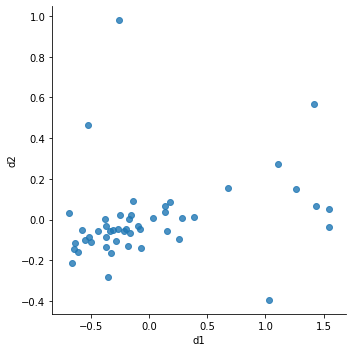

In [131]:
Xm_Opt_A = pd.DataFrame(mds_Opt_A.fit_transform(Xs_A),columns=['d1','d2'])

sns.lmplot(data=Xm_Opt_A,x='d1',y='d2',fit_reg=False)

### Número de clusters que se quieren

In [132]:
k = 8
cluster_Opt_A = KMeans(n_clusters = k)

In [133]:
cluster_Opt_A.fit(Xs_A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
df_modelar_A['cl_Optimizacion'] = Xs_A['cl_Optimizacion'] = Xm_Opt_A['cl']= cluster_Opt_A.predict(Xs_A)

In [141]:
Xm_Opt_A.head(6)
print(Xm_Opt_A.dtypes)

d1    float64
d2    float64
cl      int32
dtype: object


IndexError: invalid index to scalar variable.

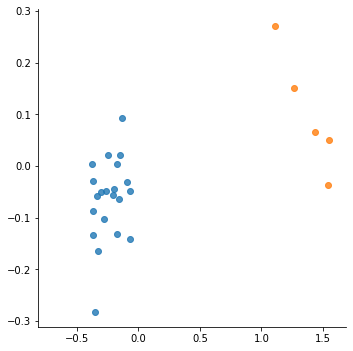

In [140]:
sns.lmplot(data=Xm_Opt_A,x='d1',y='d2',fit_reg=False,hue='cl')

In [ ]:
Xs_A

In [ ]:
list_method_dendrogram = {'average','centroid','ward'}
for method_dendrogram_i in list_method_dendrogram:
    print(method_dendrogram_i)
    dendrogram = sch.dendrogram(sch.linkage(Xs_A, method = method_dendrogram_i))
    plt.title('Dendrogram')
    plt.xlabel(llave_A)
    plt.ylabel('Euclidean distance')
    plt.show()

### Muestra de Retiro

In [ ]:
mds_Opt_R = MDS(n_components=2)

In [ ]:
Xm_Opt_R = pd.DataFrame(mds_Opt_R.fit_transform(Xs_R),columns=['d1','d2'])

sns.lmplot(data=Xm_Opt_R,x='d1',y='d2',fit_reg=False)

In [ ]:
cluster_Opt_R = KMeans(n_clusters = k)

In [ ]:
cluster_Opt_R.fit(Xs_R)

In [ ]:
df_modelar_R['cl_Optimizacion'] = Xs_R['cl_Optimizacion'] = Xm_Opt_R['cl']= cluster_Opt_R.predict(Xs_R)

In [ ]:
sns.lmplot(data=Xm_Opt_R,x='d1',y='d2',fit_reg=False,hue='cl')

In [ ]:
list_method_dendrogram = {'average','centroid','ward'}
for method_dendrogram_i in list_method_dendrogram:
    print(method_dendrogram_i)
    dendrogram = sch.dendrogram(sch.linkage(Xs_R, method = method_dendrogram_i))
    plt.title('Dendrogram')
    plt.xlabel(llave_R)
    plt.ylabel('Euclidean distance')
    plt.show()

# Clusterización por Jerarquización

## Average 

### Muestra de Retiro

In [ ]:
llave_R = 'Ciclo_Estacion_Retiro'
ls_var_R = []
for var_i in df_modelar_R.columns:
    if var_i not in {llave_R,'Colonia','Alcaldia','cl_Optimizacion'}:
        ls_var_R.append(var_i)
ls_var_R

In [ ]:
Xs_jer_R = pd.DataFrame(df_training_Retiro.transform(df_modelar_R[ls_var_R]),columns=ls_var_R)
cluster = AgglomerativeClustering(linkage='average', n_clusters=7)

In [ ]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_R)
Xp_jer_R = pd.DataFrame(pca.transform(Xs_jer_R),columns=['p1','p2'])
Xp_jer_R.reset_index()
Xp_jer_R['cluster_jer_avg_pca']= df_modelar_R['cluster_jer_avg_pca'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xp_jer_R,x='p1',y='p2',hue='cluster_jer_avg_pca',fit_reg=False)

In [ ]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_R = pd.DataFrame(mds.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xm_jer_R.reset_index()
Xm_jer_R['cluster_jer_avg_mds']= df_modelar_R['cluster_jer_avg_mds'] = cluster.fit_predict(Xs_jer_R)
Xm_jer_R.head(3)
sns.lmplot(data=Xm_jer_R,x='p1',y='p2',hue='cluster_jer_avg_mds',fit_reg=False)

In [ ]:
tsne = TSNE()
Xt_jer_R = pd.DataFrame(tsne.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xt_jer_R.reset_index()
Xt_jer_R['cluster_jer_avg_tsne']= df_modelar_R['cluster_jer_avg_tsne'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xt_jer_R,x='p1',y='p2',hue='cluster_jer_avg_tsne',fit_reg=False)

### Muestra de Arribo

In [ ]:
llave_A = 'Ciclo_Estacion_Arribo'
ls_var_A = []
for var_i in df_modelar_A.columns:
    if var_i not in {llave_A,'Colonia','Alcaldia','cl_Optimizacion'}:
        ls_var_A.append(var_i)
ls_var_A

In [ ]:
Xs_jer_A = pd.DataFrame(df_training_Arribo.transform(df_modelar_A[ls_var_A]),columns=ls_var_A)
cluster = AgglomerativeClustering(linkage='average', n_clusters=7)

In [ ]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_A)
Xp_jer_A = pd.DataFrame(pca.transform(Xs_jer_A),columns=['p1','p2'])
Xp_jer_A.reset_index()
Xp_jer_A['cluster_jer_avg_pca']= df_modelar_A['cluster_jer_avg_pca'] = cluster.fit_predict(Xs_jer_A)
sns.lmplot(data=Xp_jer_A,x='p1',y='p2',hue='cluster_jer_avg_pca',fit_reg=False)

In [ ]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_A = pd.DataFrame(mds.fit_transform(Xs_jer_A),columns=['p1','p2'])
Xm_jer_A.reset_index()
Xm_jer_A['cluster_jer_avg_mds']= df_modelar_A['cluster_jer_avg_mds'] = cluster.fit_predict(Xs_jer_A)
Xm_jer_A.head(3)
sns.lmplot(data=Xm_jer_A,x='p1',y='p2',hue='cluster_jer_avg_mds',fit_reg=False)

## Ward 

### Muestra de Retiro

In [ ]:
cluster = AgglomerativeClustering(linkage='ward', n_clusters=7)

In [ ]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_R)
Xp_jer_R = pd.DataFrame(pca.transform(Xs_jer_R),columns=['p1','p2'])
Xp_jer_R.reset_index()
Xp_jer_R['cluster_jer_wrd_pca']= df_modelar_R['cluster_jer_wrd_pca'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xp_jer_R,x='p1',y='p2',hue='cluster_jer_wrd_pca',fit_reg=False)

In [ ]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_R = pd.DataFrame(mds.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xm_jer_R.reset_index()
Xm_jer_R['cluster_jer_wrd_mds']= df_modelar_R['cluster_jer_wrd_mds'] = cluster.fit_predict(Xs_jer_R)
Xm_jer_R.head(3)
sns.lmplot(data=Xm_jer_R,x='p1',y='p2',hue='cluster_jer_wrd_mds',fit_reg=False)

In [ ]:
tsne = TSNE()
Xt_jer_R = pd.DataFrame(tsne.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xt_jer_R.reset_index()
Xt_jer_R['cluster_jer_wrd_tsne']= df_modelar_R['cluster_jer_wrd_tsne'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xt_jer_R,x='p1',y='p2',hue='cluster_jer_wrd_tsne',fit_reg=False)

### Muestra de Arribo

In [ ]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_A)
Xp_jer_A = pd.DataFrame(pca.transform(Xs_jer_A),columns=['p1','p2'])
Xp_jer_A.reset_index()
Xp_jer_A['cluster_jer_wrd_pca']= df_modelar_A['cluster_jer_wrd_pca'] = cluster.fit_predict(Xs_jer_A)
sns.lmplot(data=Xp_jer_A,x='p1',y='p2',hue='cluster_jer_wrd_pca',fit_reg=False)

In [ ]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_A = pd.DataFrame(mds.fit_transform(Xs_jer_A),columns=['p1','p2'])
Xm_jer_A.reset_index()
Xm_jer_A['cluster_jer_wrd_mds']= df_modelar_A['cluster_jer_wrd_mds'] = cluster.fit_predict(Xs_jer_A)
Xm_jer_A.head(3)
sns.lmplot(data=Xm_jer_A,x='p1',y='p2',hue='cluster_jer_wrd_mds',fit_reg=False)

In [ ]:
tsne = TSNE()
Xt_jer_A = pd.DataFrame(tsne.fit_transform(Xs_jer_A),columns=['p1','p2'])
Xt_jer_A.reset_index()
Xt_jer_A['cluster_jer_wrd_tsne']= df_modelar_A['cluster_jer_wrd_tsne'] = cluster.fit_predict(Xs_jer_A)
sns.lmplot(data=Xt_jer_A,x='p1',y='p2',hue='cluster_jer_wrd_tsne',fit_reg=False)

## Centroide 

### Muestra de Retiro

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(Xs_jer_R, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Cicloestaciones')
plt.ylabel('Euclidean distance')
plt.show()

### Muestra de Arribo

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(Xs_jer_A, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Cicloestaciones')
plt.ylabel('Euclidean distance')
plt.show()